In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [2]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [3]:
df = pd.read_csv('../data/processed/df_train_pp.csv')

In [4]:
df_orig = df.copy()

In [5]:
df.head()

,Unnamed: 0,OBS_ID,ï..id,symbol,name,categories_0,contract_address,transaction_count,holder_count,timestamp,...,KW31,KW32,KW33,KW34,KW35,KW36,KW37,KW38,KW39,success
0,0,235691,01coin,zoc,01coin,Masternodes,NaN,NaN,NaN,Sep-26-2019 15:59:01 PM,...,0.002448,0.002808,0.002120,0.001356,0.002013,0.002357,0.002535,0.002166,0.001779,0.0
1,1,235692,0x,zrx,0x,Protocol,0xe41d2489571d322189246dafa5ebde1f4699f498,975773.0,109840.0,Sep-26-2019 01:56:58 PM,...,0.219315,0.190212,0.173953,0.176836,0.153498,0.159610,0.160611,0.226291,0.217944,1.0
2,2,235693,0xcert,zxc,0xcert,Protocol,0x83e2be8d114f9661221384b3a50d24b96a5653f5,22730.0,13914.0,Sep-25-2019 11:58:48 PM,...,0.001563,0.000979,0.000914,0.001082,0.000982,0.000987,0.000688,0.000950,0.000745,0.0
3,3,235694,0xdark,oxd,0xDark,NaN,0xe1ae07ea12bdae73b7f546075f5c78f65aad4876,125.0,51.0,Sep-26-2019 04:58:35 AM,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046199,0.0
4,4,235695,10m-token,10mt,10M Token,NaN,0xe701cd3329057aea9d54300ddd05e41b8d74727a,16417.0,6250.0,Sep-25-2019 11:14:11 PM,...,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.000887,0.0


In [6]:
x = df.loc[:, 'KW1'].values

In [7]:
y = df.loc[:, 'success'].values

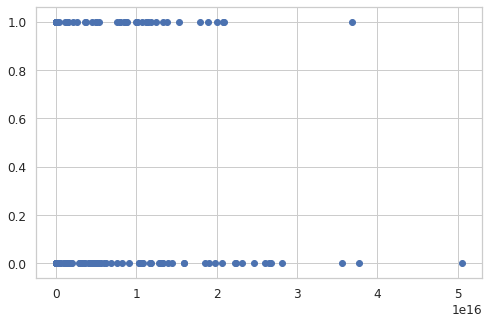

In [8]:
fig, ax = plt.subplots()

ax.scatter(x, y)

In [9]:
cols = df.columns.values

In [10]:
sliced = []
i=0
for col in cols:
    if 'KW' in col:
        sliced.append(col)
        i +=1
    if i == 5:
        break
sliced.append('success')

In [11]:
sliced

['KW1', 'KW2', 'KW3', 'KW4', 'KW5', 'success']

In [12]:
data = df.loc[:, sliced]

In [13]:
data

,KW1,KW2,KW3,KW4,KW5,success
0,6.019062e-03,5.119072e-03,0.004673,0.004449,3.425834e-03,0.0
1,3.165237e-01,2.832672e-01,0.300112,0.301383,2.518378e-01,1.0
2,2.340720e-03,1.732933e-03,0.002813,0.003344,2.585318e-03,0.0
3,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
...,...,...,...,...,...,...
4752,0.000000e+00,4.634581e-02,0.000000,0.000000,6.200896e-02,0.0
4753,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
4754,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
4755,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0


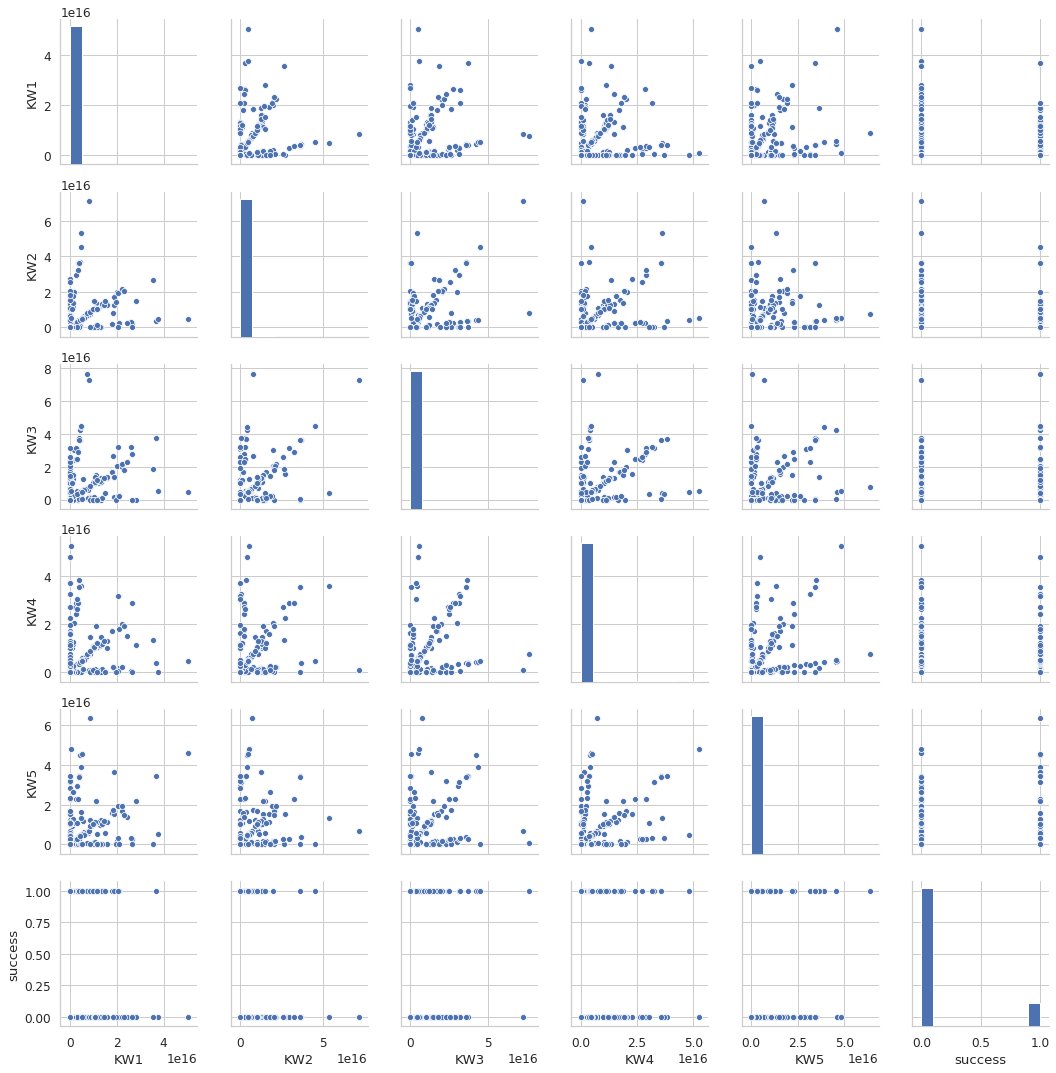

In [14]:
sns.pairplot(data)

In [15]:
df.columns

Index(['Unnamed: 0', 'OBS_ID', 'ï..id', 'symbol', 'name', 'categories_0',
       'contract_address', 'transaction_count', 'holder_count', 'timestamp',
       'country_origin', 'links_homepage', 'links_blockchain_site',
       'links_twitter_screen_name', 'links_facebook_username',
       'links_subreddit_url', 'links_repos_url_github',
       'market_data_current_price_usd', 'market_data_ath_usd',
       'market_data_ath_date_usd', 'market_data_high_24h_usd',
       'market_data_low_24h_usd', 'market_data_total_supply',
       'market_data_circulating_supply', 'market_data_first_time_trading',
       'community_data_facebook_likes', 'community_data_twitter_followers',
       'community_data_reddit_average_posts_48h',
       'community_data_reddit_average_comments_48h',
       'community_data_reddit_subscribers',
       'community_data_reddit_accounts_active_48h',
       'community_data_telegram_channel_user_count', 'developer_data_forks',
       'developer_data_stars', 'developer_data_

In [16]:
_categorical_featuers = [
    'categories_0',
    'country_origin',
    'ico_data_country_origin',
    'ico_data_hardcap_currency',
    'ico_data_softcap_currency',
    'ico_data_total_raised_currency',
    ]

   


_numerical_features = [
    'transaction_count',
    'holder_count',
    'market_data_current_price_usd',
    'market_data_ath_usd',
    'market_data_total_supply',
    'market_data_circulating_supply',
    'public_interest_stats_bing_matches',
    'market_data_high_24h_usd',
    'KW1', 'KW2', 'KW3', 'KW4', 'KW5',
    'KW6', 'KW7', 'KW8', 'KW9', 'KW10', 'KW11', 'KW12', 'KW13', 'KW14',
    'KW15', 'KW16', 'KW17', 'KW18', 'KW19', 'KW20', 'KW21', 'KW22', 'KW23',
    'KW24', 'KW25', 'KW26', 'KW27', 'KW28', 'KW29', 'KW30', 'KW31', 'KW32',
    'KW33', 'KW34', 'KW35', 'KW36', 'KW37', 'KW38', 'KW39',
    'community_data_facebook_likes',
    'community_data_twitter_followers',
    'community_data_telegram_channel_user_count',
    'developer_data_forks',
    'developer_data_stars',
    'developer_data_subscribers',
    'developer_data_total_issues',
    'developer_data_closed_issues',
    'developer_data_pull_requests_merged',
    'developer_data_pull_request_contributors',
    'developer_data_commit_count_4_weeks',
    'ico_data_amount_for_sale',
    'ico_data_hardcap_amount',
    'ico_data_softcap_amount',
    'ico_data_total_raised',
    'public_interest_stats_bing_matches'
]    

In [17]:
df.fillna(0, inplace=True)

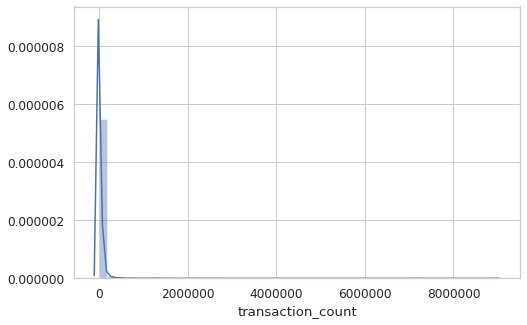

In [18]:
sns.distplot(df['transaction_count'])

## Scatter Plot KW to Success

In [19]:
cols = df.columns.values

In [20]:
sliced = []
i=0
for col in cols:
    if 'KW' in col:
        sliced.append(col)
        i +=1

In [21]:
round(len(sliced) / 3)

13

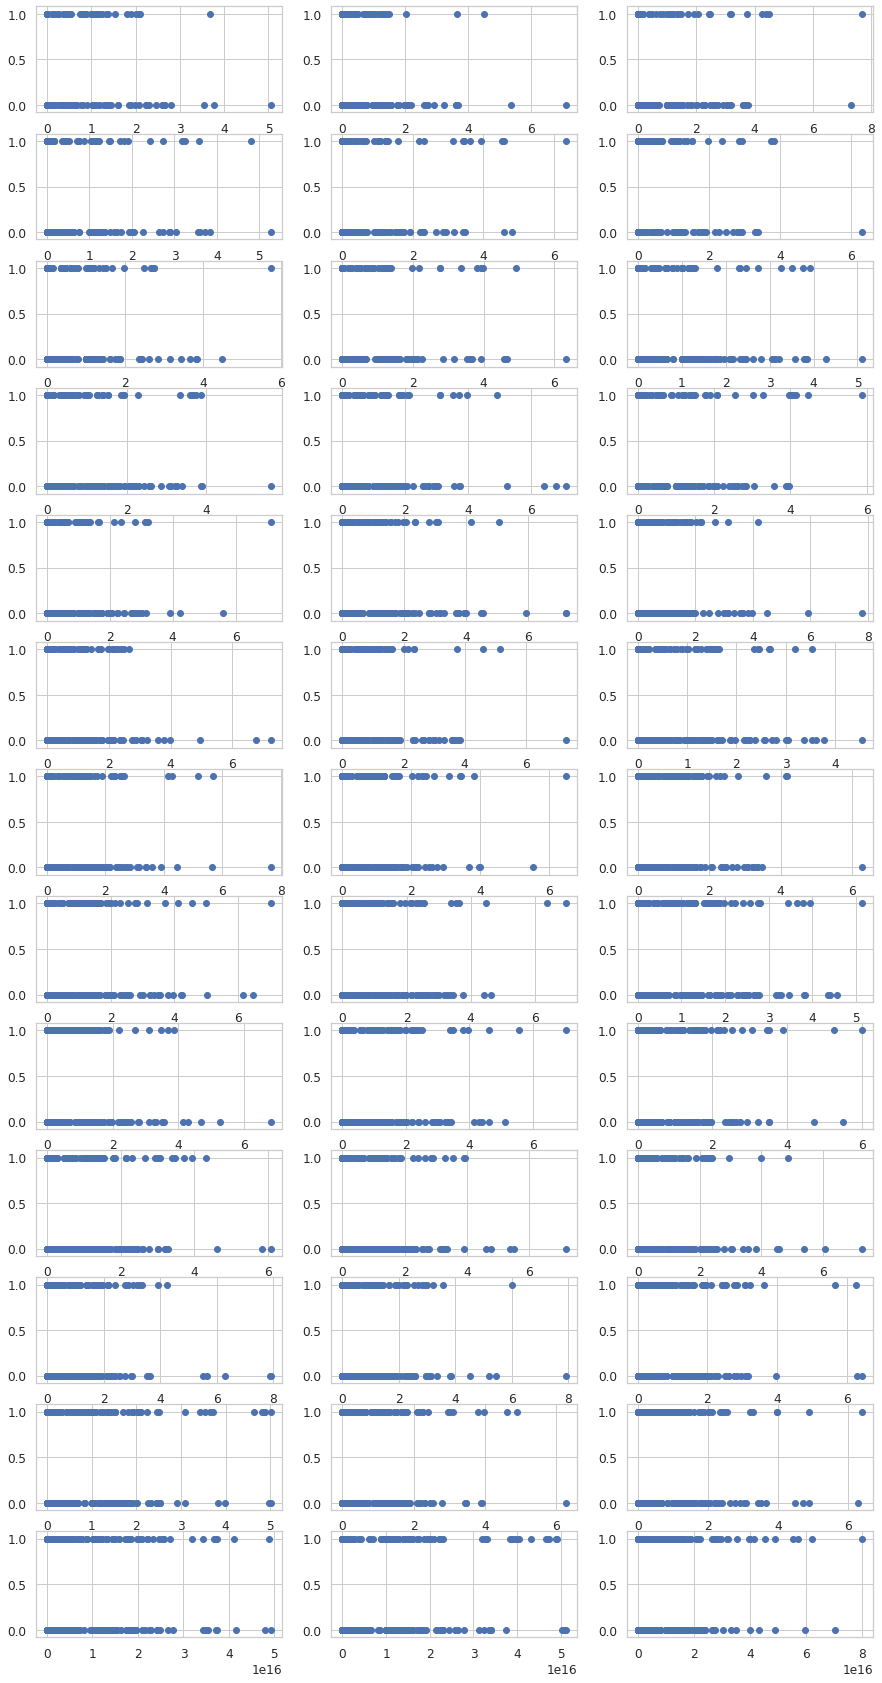

In [22]:
fig, axs = plt.subplots(nrows=round(len(sliced) / 3), ncols=3, figsize=(15,30))

for ax, col in zip(axs.flat, sliced):
    ax.scatter(df.loc[:, col], df.loc[:, 'success'])

## Correlations numerical Variables

In [23]:
data = df.loc[:, _numerical_features + ['success']]

In [41]:
f = plt.figure(figsize=(19, 15))
data.corr().loc[:, 'success']

transaction_count                    -0.012911
holder_count                         -0.014872
market_data_current_price_usd         0.156233
market_data_ath_usd                   0.001078
market_data_total_supply              0.033721
                                        ...   
ico_data_hardcap_amount              -0.011055
ico_data_softcap_amount              -0.008447
ico_data_total_raised                 0.007062
public_interest_stats_bing_matches   -0.011381
success                               1.000000
Name: success, Length: 64, dtype: float64

In [ ]:
data = df.loc[:, _numerical_features + ['success']].corr()
data

In [ ]:
data = pd.DataFrame(data.loc[:, 'success'])

In [ ]:
data = data.iloc[:-1]
data

In [ ]:
x = data.index.values
x = range(len(data.index.values))
y = data.success.values

In [ ]:
fig = px.bar(x=x, y=y, range_y=(-.5,1), labels={'y':'Correlation', 'x':'Numerical Columns'})
fig.show()


In [ ]:
plotly.offline.plot(fig, image='png')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(data.index, data.success);
ax.set_xticklabels(data.index, rotation = 45, ha="right");
ax.set_ylim(bottom=-1, top=1);
fig.save

In [ ]:
data.shape

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.bar(data)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45);
plt.yticks(range(data.shape[0]), data.index, fontsize=14);

In [ ]:

f = plt.figure(figsize=(19, 15))
plt.matshow(data, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [56]:
!ls ../reports/figures

,transaction_count,holder_count,market_data_current_price_usd,market_data_ath_usd,market_data_total_supply,market_data_circulating_supply,public_interest_stats_bing_matches,market_data_high_24h_usd,KW1,KW2,...,developer_data_closed_issues,developer_data_pull_requests_merged,developer_data_pull_request_contributors,developer_data_commit_count_4_weeks,ico_data_amount_for_sale,ico_data_hardcap_amount,ico_data_softcap_amount,ico_data_total_raised,public_interest_stats_bing_matches,success
transaction_count,1.000000,0.496723,0.003740,0.024090,-0.003488,0.039144,-0.007680,0.110042,0.015038,0.071788,...,-0.001738,0.117677,0.128729,0.068785,0.014018,0.105008,0.460794,-0.021157,-0.007680,-0.010260
holder_count,0.496723,1.000000,-0.023690,0.002298,-0.006690,0.045185,-0.006707,0.028945,-0.011291,0.006634,...,-0.005264,0.085452,0.089815,0.044145,0.068593,0.073522,0.155298,-0.027155,-0.006707,-0.005829
market_data_current_price_usd,0.003740,-0.023690,1.000000,0.215341,-0.003175,-0.029046,-0.016441,0.916458,0.293607,0.204459,...,-0.004074,0.034649,0.046013,0.028631,-0.005176,-0.001657,-0.007440,-0.004859,-0.016441,0.155709
market_data_ath_usd,0.024090,0.002298,0.215341,1.000000,-0.001151,0.000621,0.006110,0.206020,0.173135,0.023352,...,0.001870,0.004559,0.002513,0.004365,-0.003298,-0.006630,-0.009916,-0.005498,0.006110,0.000831
market_data_total_supply,-0.003488,-0.006690,-0.003175,-0.001151,1.000000,-0.003647,-0.004941,-0.003419,-0.002148,-0.002055,...,-0.000401,-0.002477,-0.003879,-0.001582,-0.001046,0.009587,0.019416,-0.002256,-0.004941,0.035795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ico_data_hardcap_amount,0.105008,0.073522,-0.001657,-0.006630,0.009587,-0.021638,-0.005944,-0.001850,0.020435,0.007624,...,NaN,-0.006906,-0.001540,-0.003933,-0.003839,1.000000,0.704300,-0.005730,-0.005944,-0.018444
ico_data_softcap_amount,0.460794,0.155298,-0.007440,-0.009916,0.019416,-0.020258,0.002566,-0.008256,-0.008254,-0.005978,...,NaN,-0.011071,-0.011574,-0.006736,-0.003447,0.704300,1.000000,-0.005027,0.002566,-0.026121
ico_data_total_raised,-0.021157,-0.027155,-0.004859,-0.005498,-0.002256,-0.017011,-0.013024,-0.004440,-0.006145,-0.006025,...,-0.001548,-0.006289,-0.005615,-0.006421,-0.002724,-0.005730,-0.005027,1.000000,-0.013024,0.031456
public_interest_stats_bing_matches,-0.007680,-0.006707,-0.016441,0.006110,-0.004941,-0.012735,1.000000,-0.015720,-0.003066,-0.006150,...,-0.005402,-0.008432,-0.001530,-0.011390,-0.005642,-0.005944,0.002566,-0.013024,1.000000,-0.011452


In [80]:
data = pd.DataFrame(data.loc[:, 'success'])

In [82]:
data = data.iloc[:-1]
data

,success
transaction_count,-0.010260
holder_count,-0.005829
market_data_current_price_usd,0.155709
market_data_ath_usd,0.000831
market_data_total_supply,0.035795
...,...
ico_data_amount_for_sale,-0.013485
ico_data_hardcap_amount,-0.018444
ico_data_softcap_amount,-0.026121
ico_data_total_raised,0.031456


In [114]:
data[data.success>0]

,success
market_data_current_price_usd,0.155709
market_data_ath_usd,0.000831
market_data_total_supply,0.035795
market_data_high_24h_usd,0.151842
KW1,0.064166
KW2,0.036837
KW3,0.066570
KW4,0.062929
KW5,0.076555
KW6,0.049876


In [110]:
x = data.index.values
x = range(len(data.index.values))
y = data.success.values

In [111]:
fig = px.bar(x=x, y=y, range_y=(-.5,1), labels={'y':'Correlation', 'x':'Numerical Columns'})
fig.show()


In [112]:
plotly.offline.plot(fig, image='png')

'temp-plot.html'

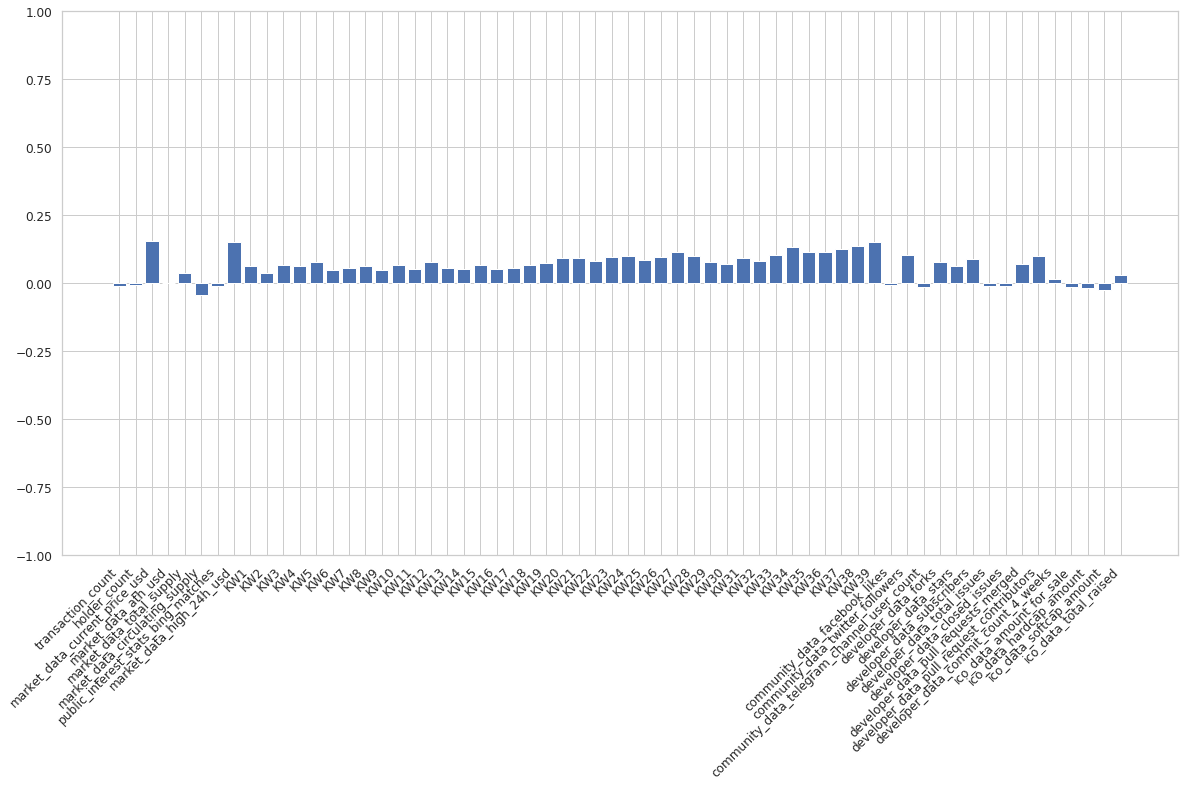

In [85]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(data.index, data.success);
ax.set_xticklabels(data.index, rotation = 45, ha="right");
ax.set_ylim(bottom=-1, top=1);
fig.save

In [67]:
data.shape

(64, 1)

In [73]:
f = plt.figure(figsize=(19, 15))
plt.bar(data)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45);
plt.yticks(range(data.shape[0]), data.index, fontsize=14);

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1368x1080 with 0 Axes>

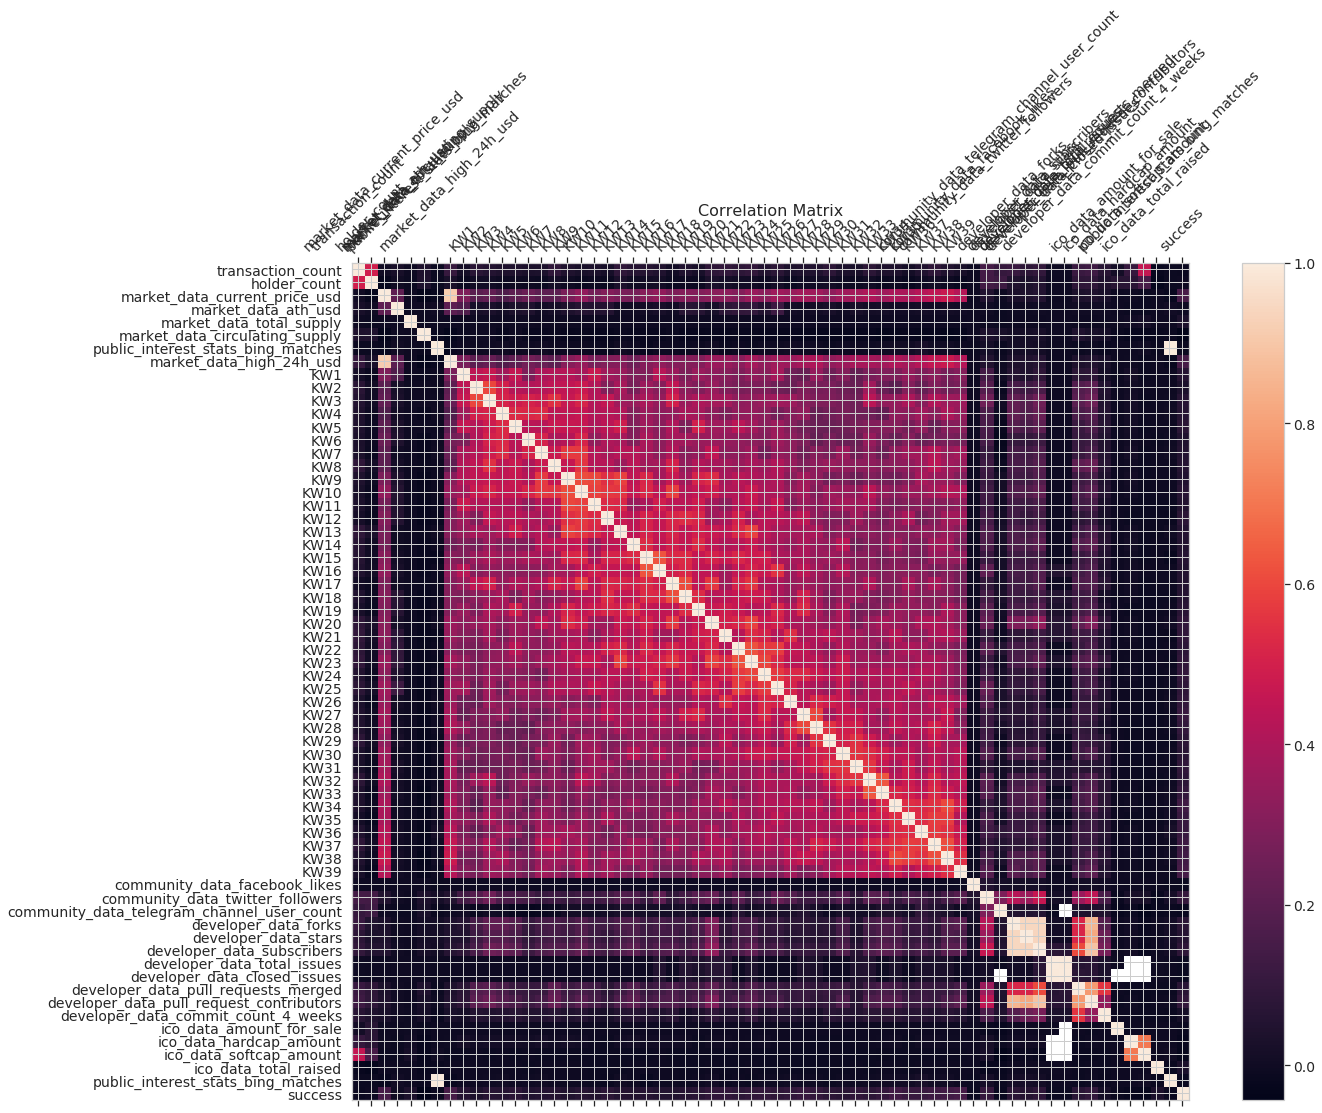

In [57]:

f = plt.figure(figsize=(19, 15))
plt.matshow(data, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [25]:
!ls ../reports/figures

heatmap_correlations.png


In [26]:
f.savefig('../reports/figures/heatmap_correlations.png')

## Value Counts of categorical Variables

In [27]:
def plot_cnt_distribution(df, col, target='success', 
                          order_by_most_frequent=True):
    
    import warnings
    warnings.filterwarnings("ignore")
    
    total = len(df)
    tmp = pd.crosstab(df[col], df[target], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'no' + target, 1:target}, inplace=True)
    
    relative = pd.DataFrame(df[col].value_counts())
    relative = relative.assign(relative = relative[col] / total)
    relative = relative.reset_index()
    relative = relative[["index", "relative"]]
    relative.columns = [str(col), "relative"]
    tmp = pd.merge(tmp, relative)
    if order_by_most_frequent:
        tmp = tmp.sort_values('relative', ascending=False)
    
    plt.figure(figsize=(40,20));
    plt.suptitle('{} Distribution'.format(col), fontsize=24)
    plt.subplot(211)
    g1 = sns.countplot(x=col, data=df, order=list(tmp[col].values), 
                       label="Count of {}".format(col));
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y=target, data=tmp, 
                       order=list(tmp[col].values),
                   color='black', legend=True, label="Nr. of " + target)
    g1.set_title('Countplot of all distributions', fontsize=20);
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);
    #g1.legend()

    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

    plt.subplot(212)
    g1 = sns.countplot(x=col, hue=target,
                       data=df, order=list(tmp[col].values));
    g1.set_title('Countplot with target ' + target + ' 1/0');
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45);


    for p in g1.patches:
            height = p.get_height()
            g1.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center",fontsize=12) 

            
    plt.subplots_adjust(hspace=.4, top = 0.9)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


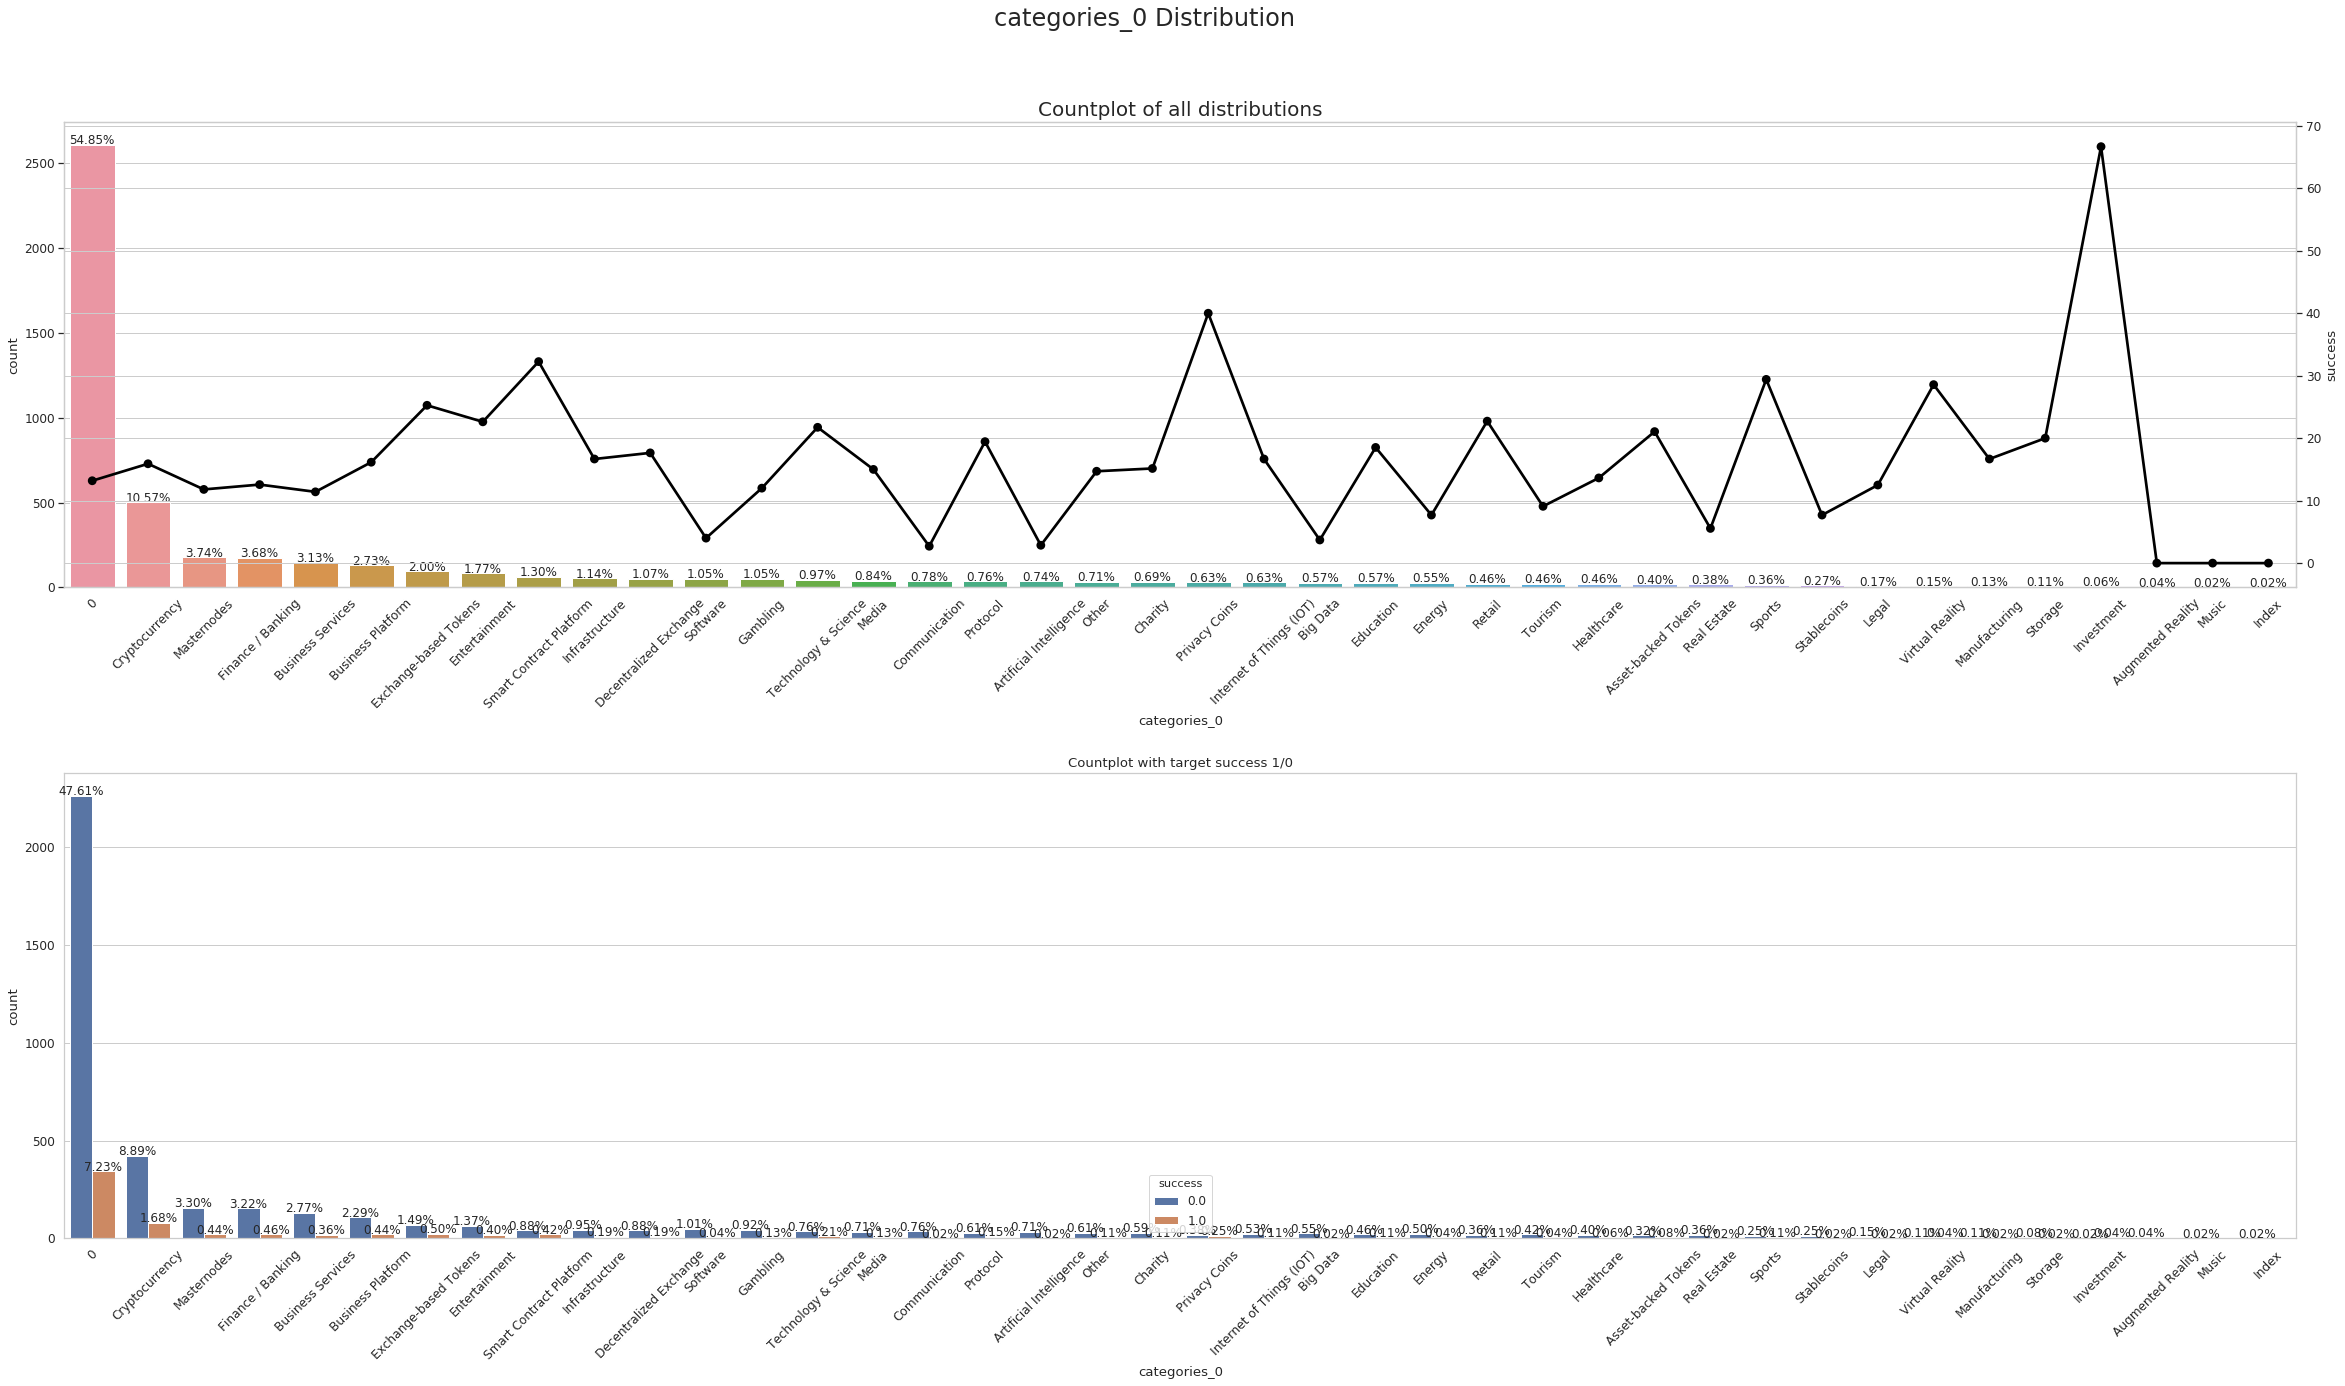

In [28]:
plot_cnt_distribution(df, 'categories_0')

### Clean data and get rid of values which occur to less

In [29]:
_categorical_featuers

['categories_0',
 'country_origin',
 'ico_data_country_origin',
 'ico_data_hardcap_currency',
 'ico_data_softcap_currency',
 'ico_data_total_raised_currency']

In [30]:
df.categories_0.value_counts()

0                           2609
Cryptocurrency               503
Masternodes                  178
Finance / Banking            175
Business Services            149
Business Platform            130
Exchange-based Tokens         95
Entertainment                 84
Smart Contract Platform       62
Infrastructure                54
Decentralized Exchange        51
Software                      50
Gambling                      50
Technology & Science          46
Media                         40
Communication                 37
Protocol                      36
Artificial Intelligence       35
Other                         34
Charity                       33
Internet of Things (IOT)      30
Privacy Coins                 30
Big Data                      27
Education                     27
Energy                        26
Healthcare                    22
Tourism                       22
Retail                        22
Asset-backed Tokens           19
Real Estate                   18
Sports    

In [31]:
def set_quantile_to_value(df, col, quantile=0.25):
    df_less_quantile = df[col].value_counts().quantile(quantile)
    list_too_less = df[col].value_counts().loc[
        df[col].value_counts()<df_less_quantile].index.values
    
    df.loc[df[col].isna(), col] = 'NA'
    
    df.loc[df[col].isin(list_too_less), col] = "Other"
    df.loc[df[col] == 0, col] = "Other"
    return df

In [32]:
df = set_quantile_to_value(df_orig, 'categories_0')

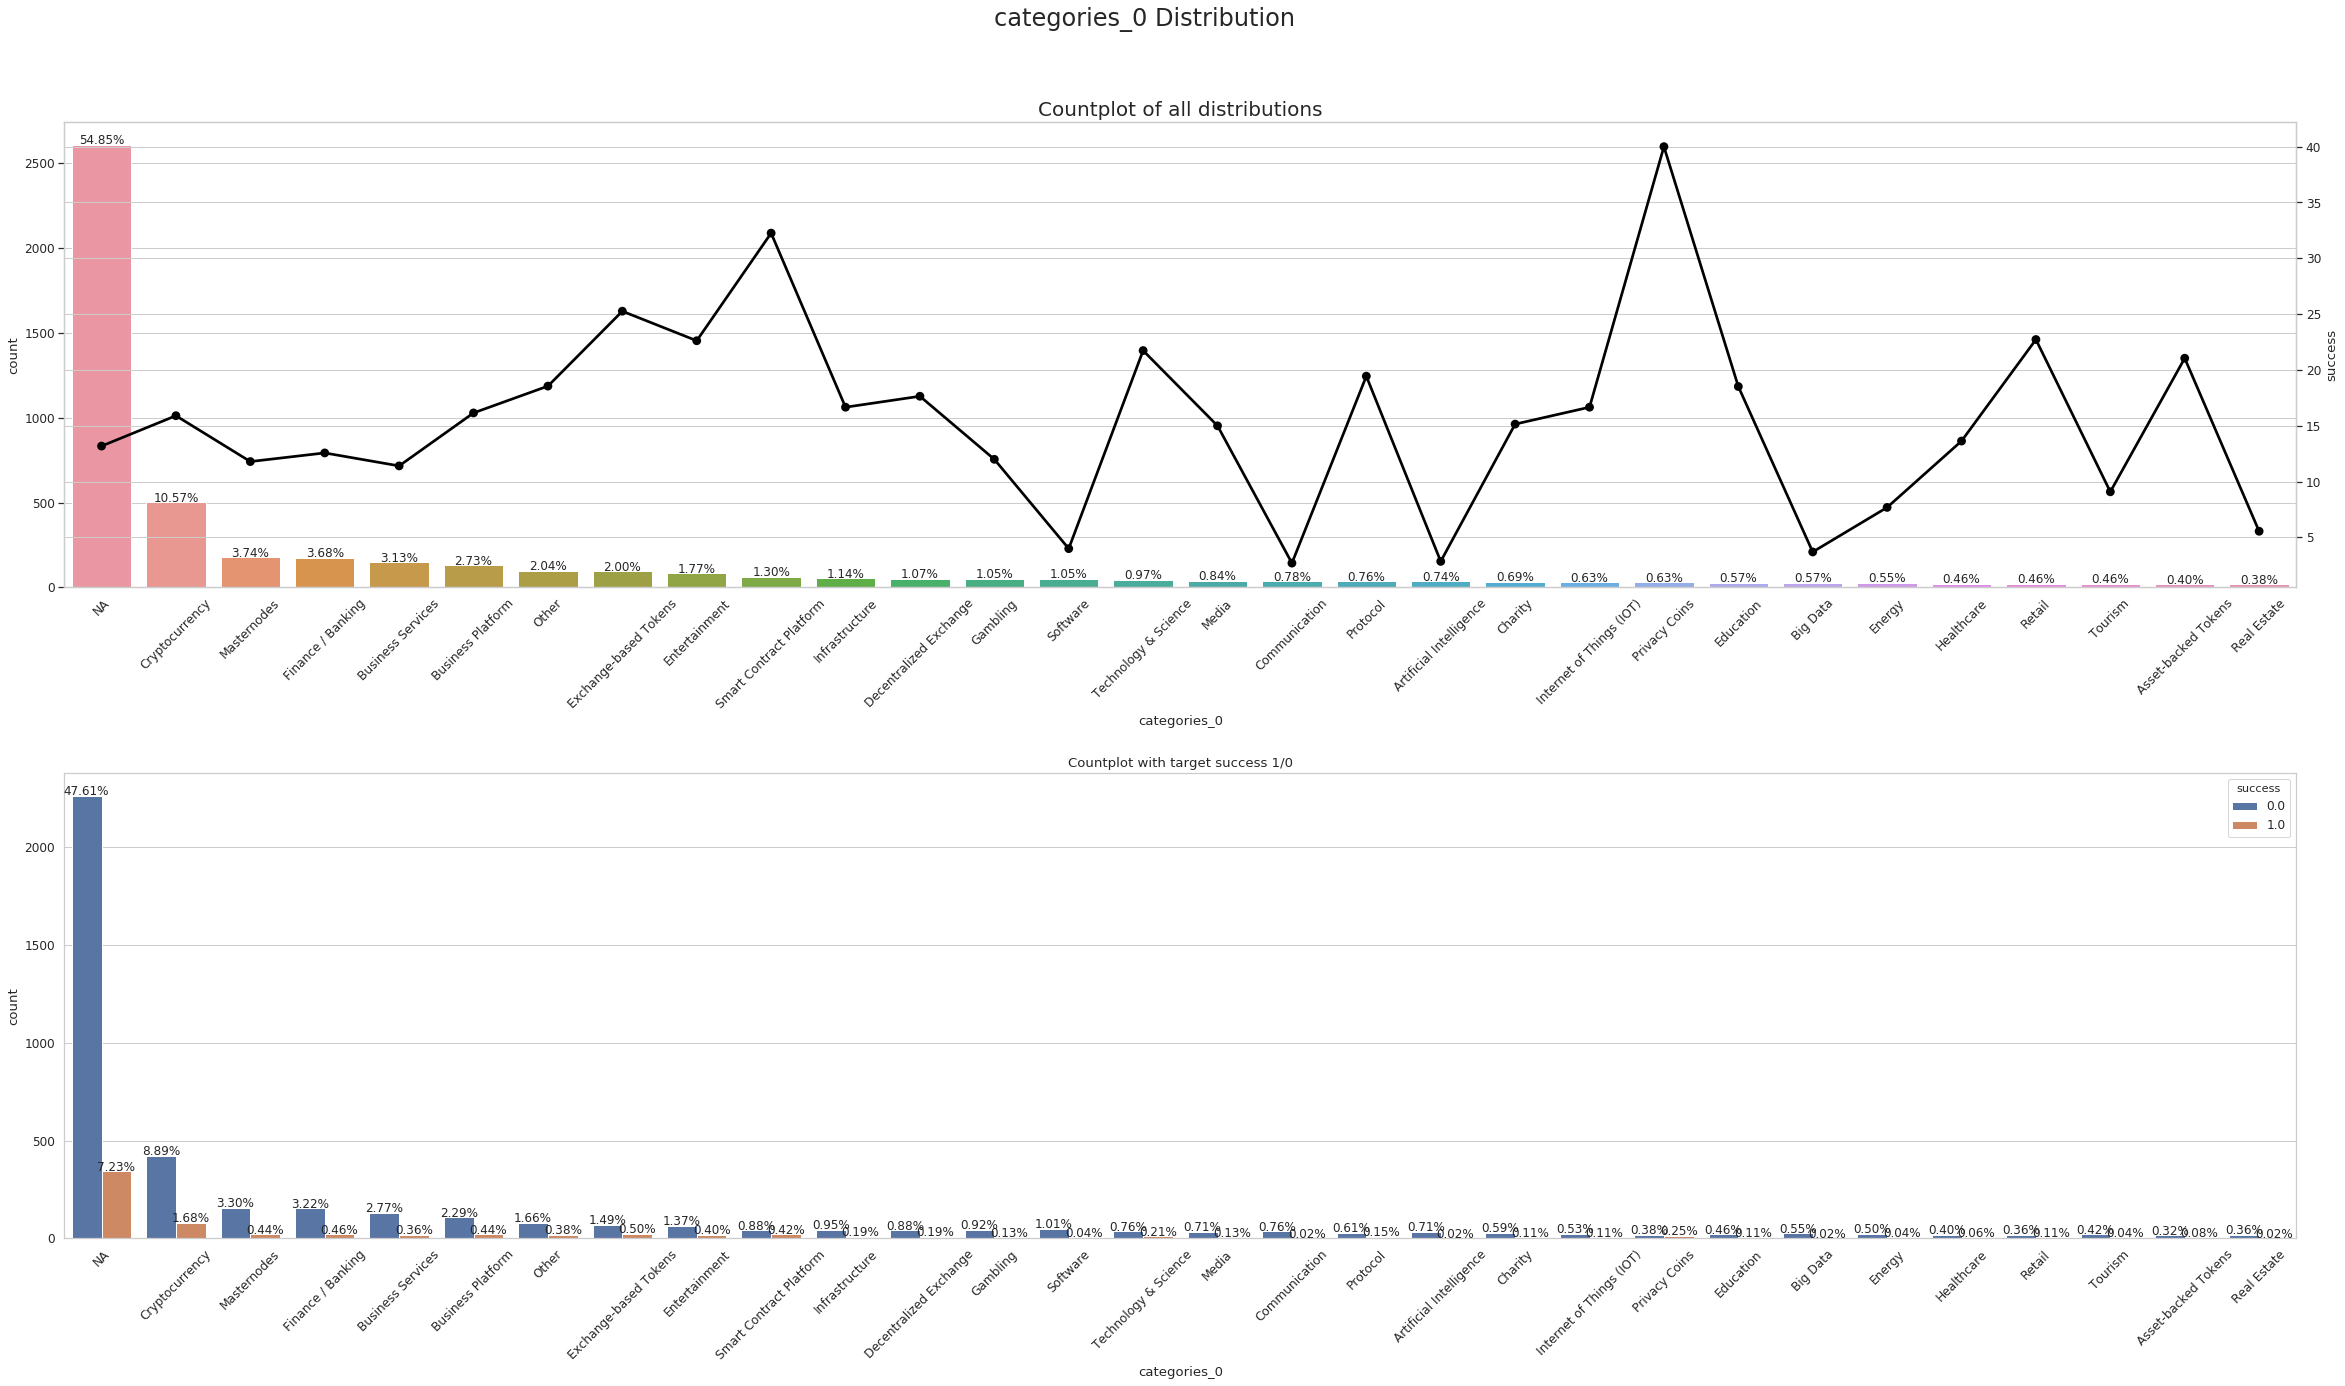

In [33]:
plot_cnt_distribution(df, 'categories_0')

In [34]:
df_orig.country_origin.value_counts().describe()

count    111.000000
mean      17.396396
std       39.294524
min        1.000000
25%        2.000000
50%        4.000000
75%       15.000000
max      287.000000
Name: country_origin, dtype: float64

In [35]:
df = set_quantile_to_value(df_orig, 'country_origin')

In [36]:
df.country_origin.value_counts().describe()

count      87.000000
mean       54.678161
std       303.664843
min         2.000000
25%         4.000000
50%         9.000000
75%        24.500000
max      2826.000000
Name: country_origin, dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

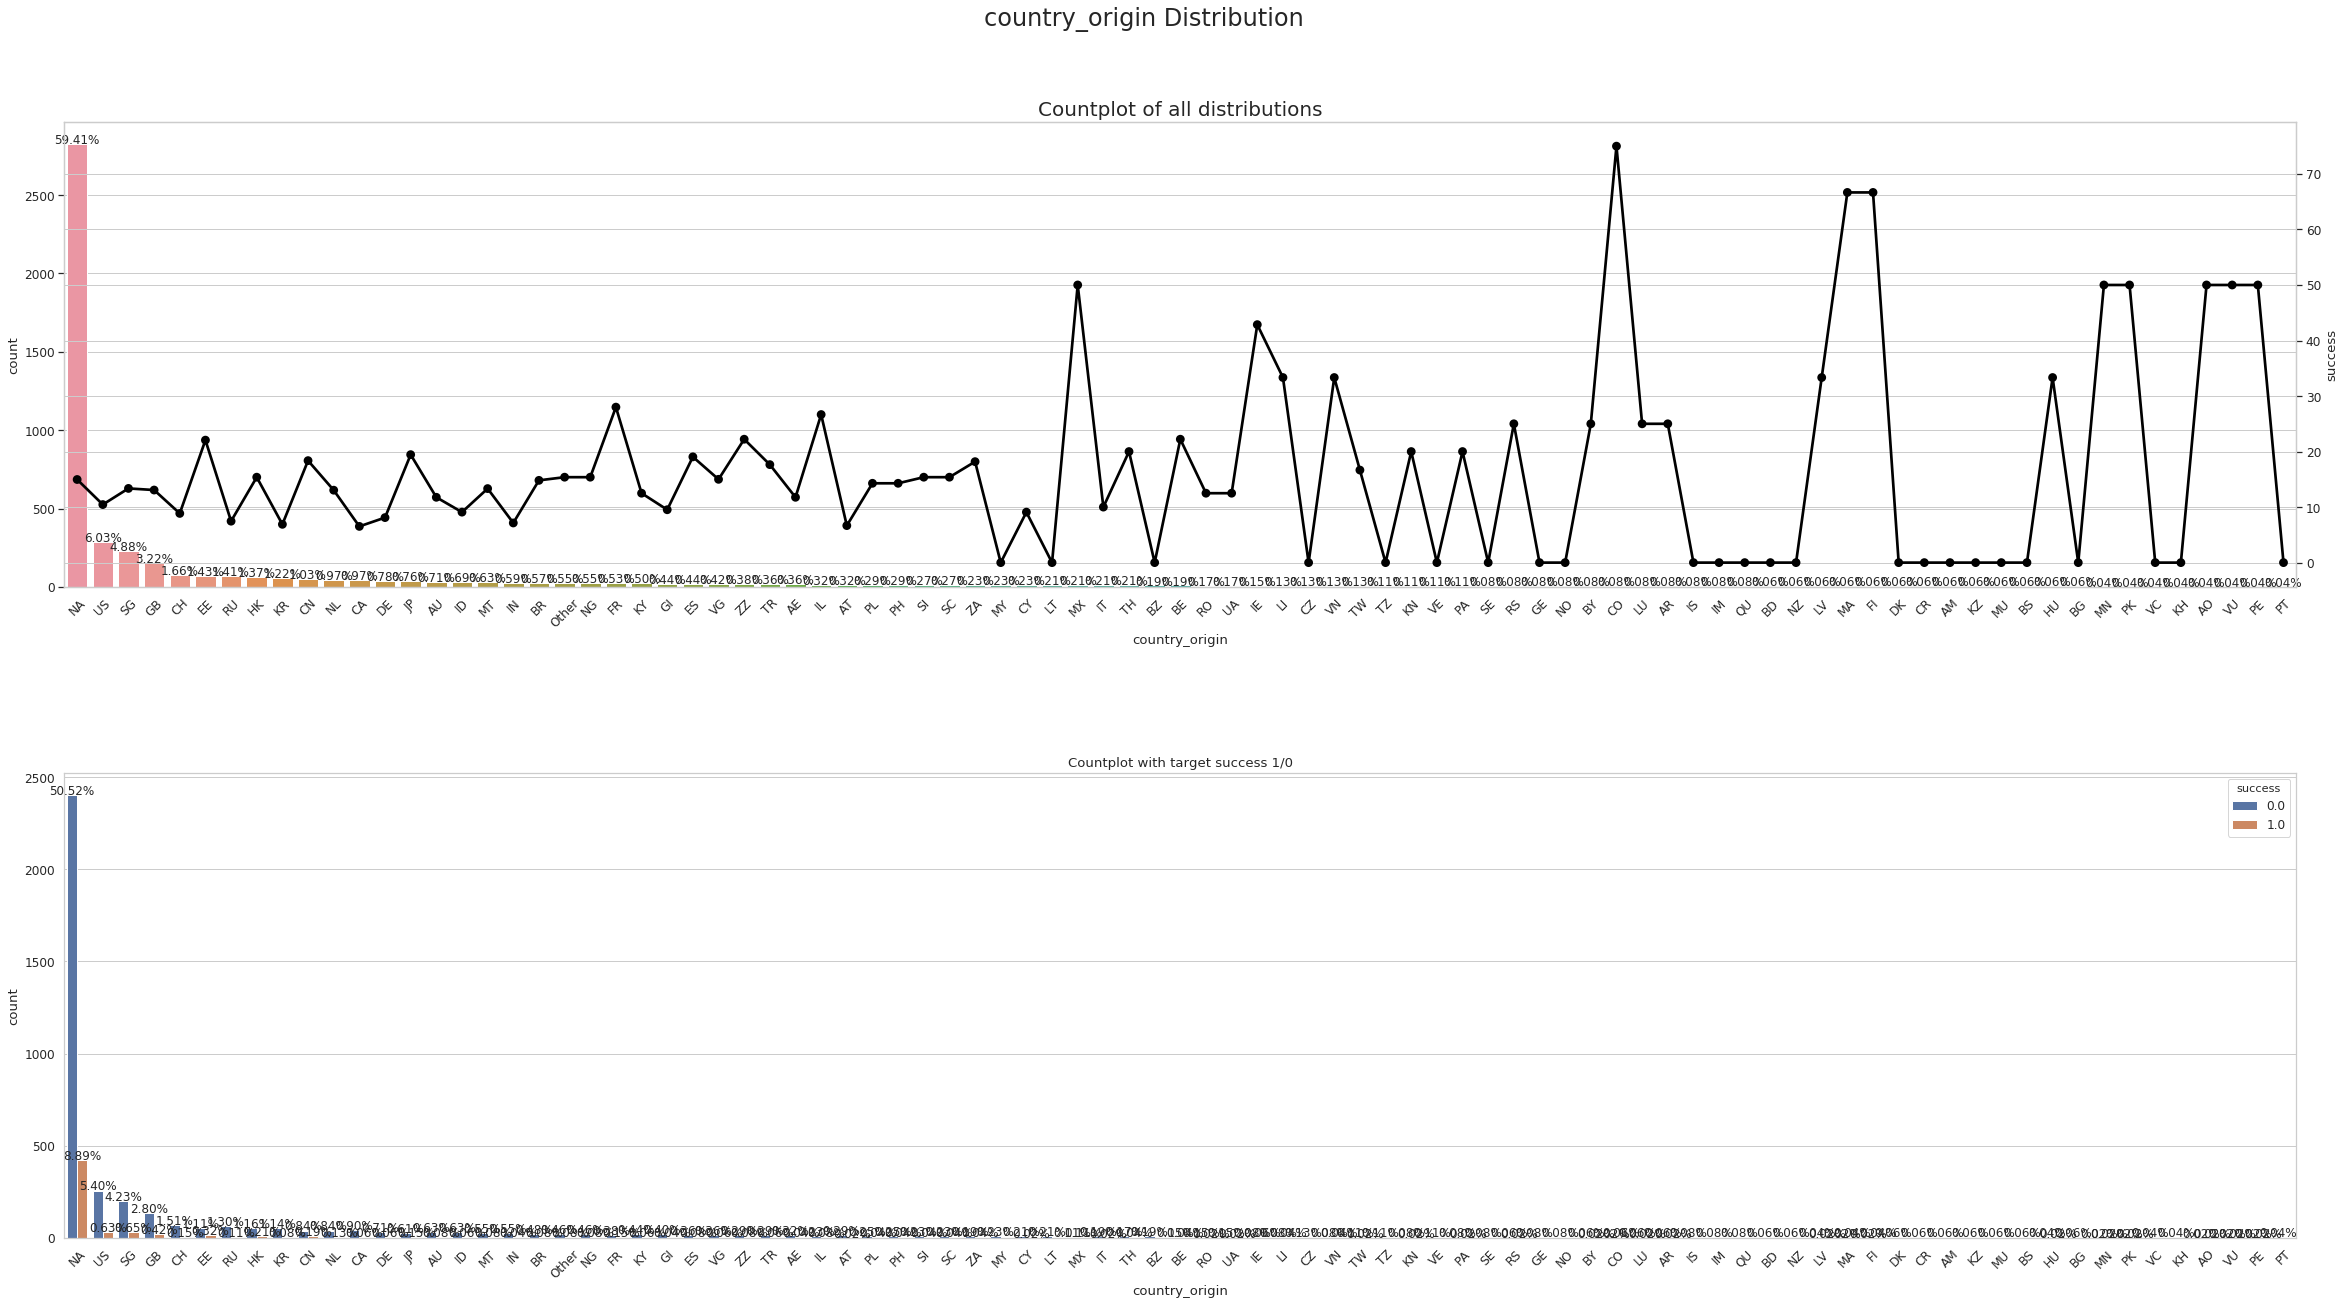

In [37]:
plot_cnt_distribution(df, 'country_origin');

### Plot all count plots

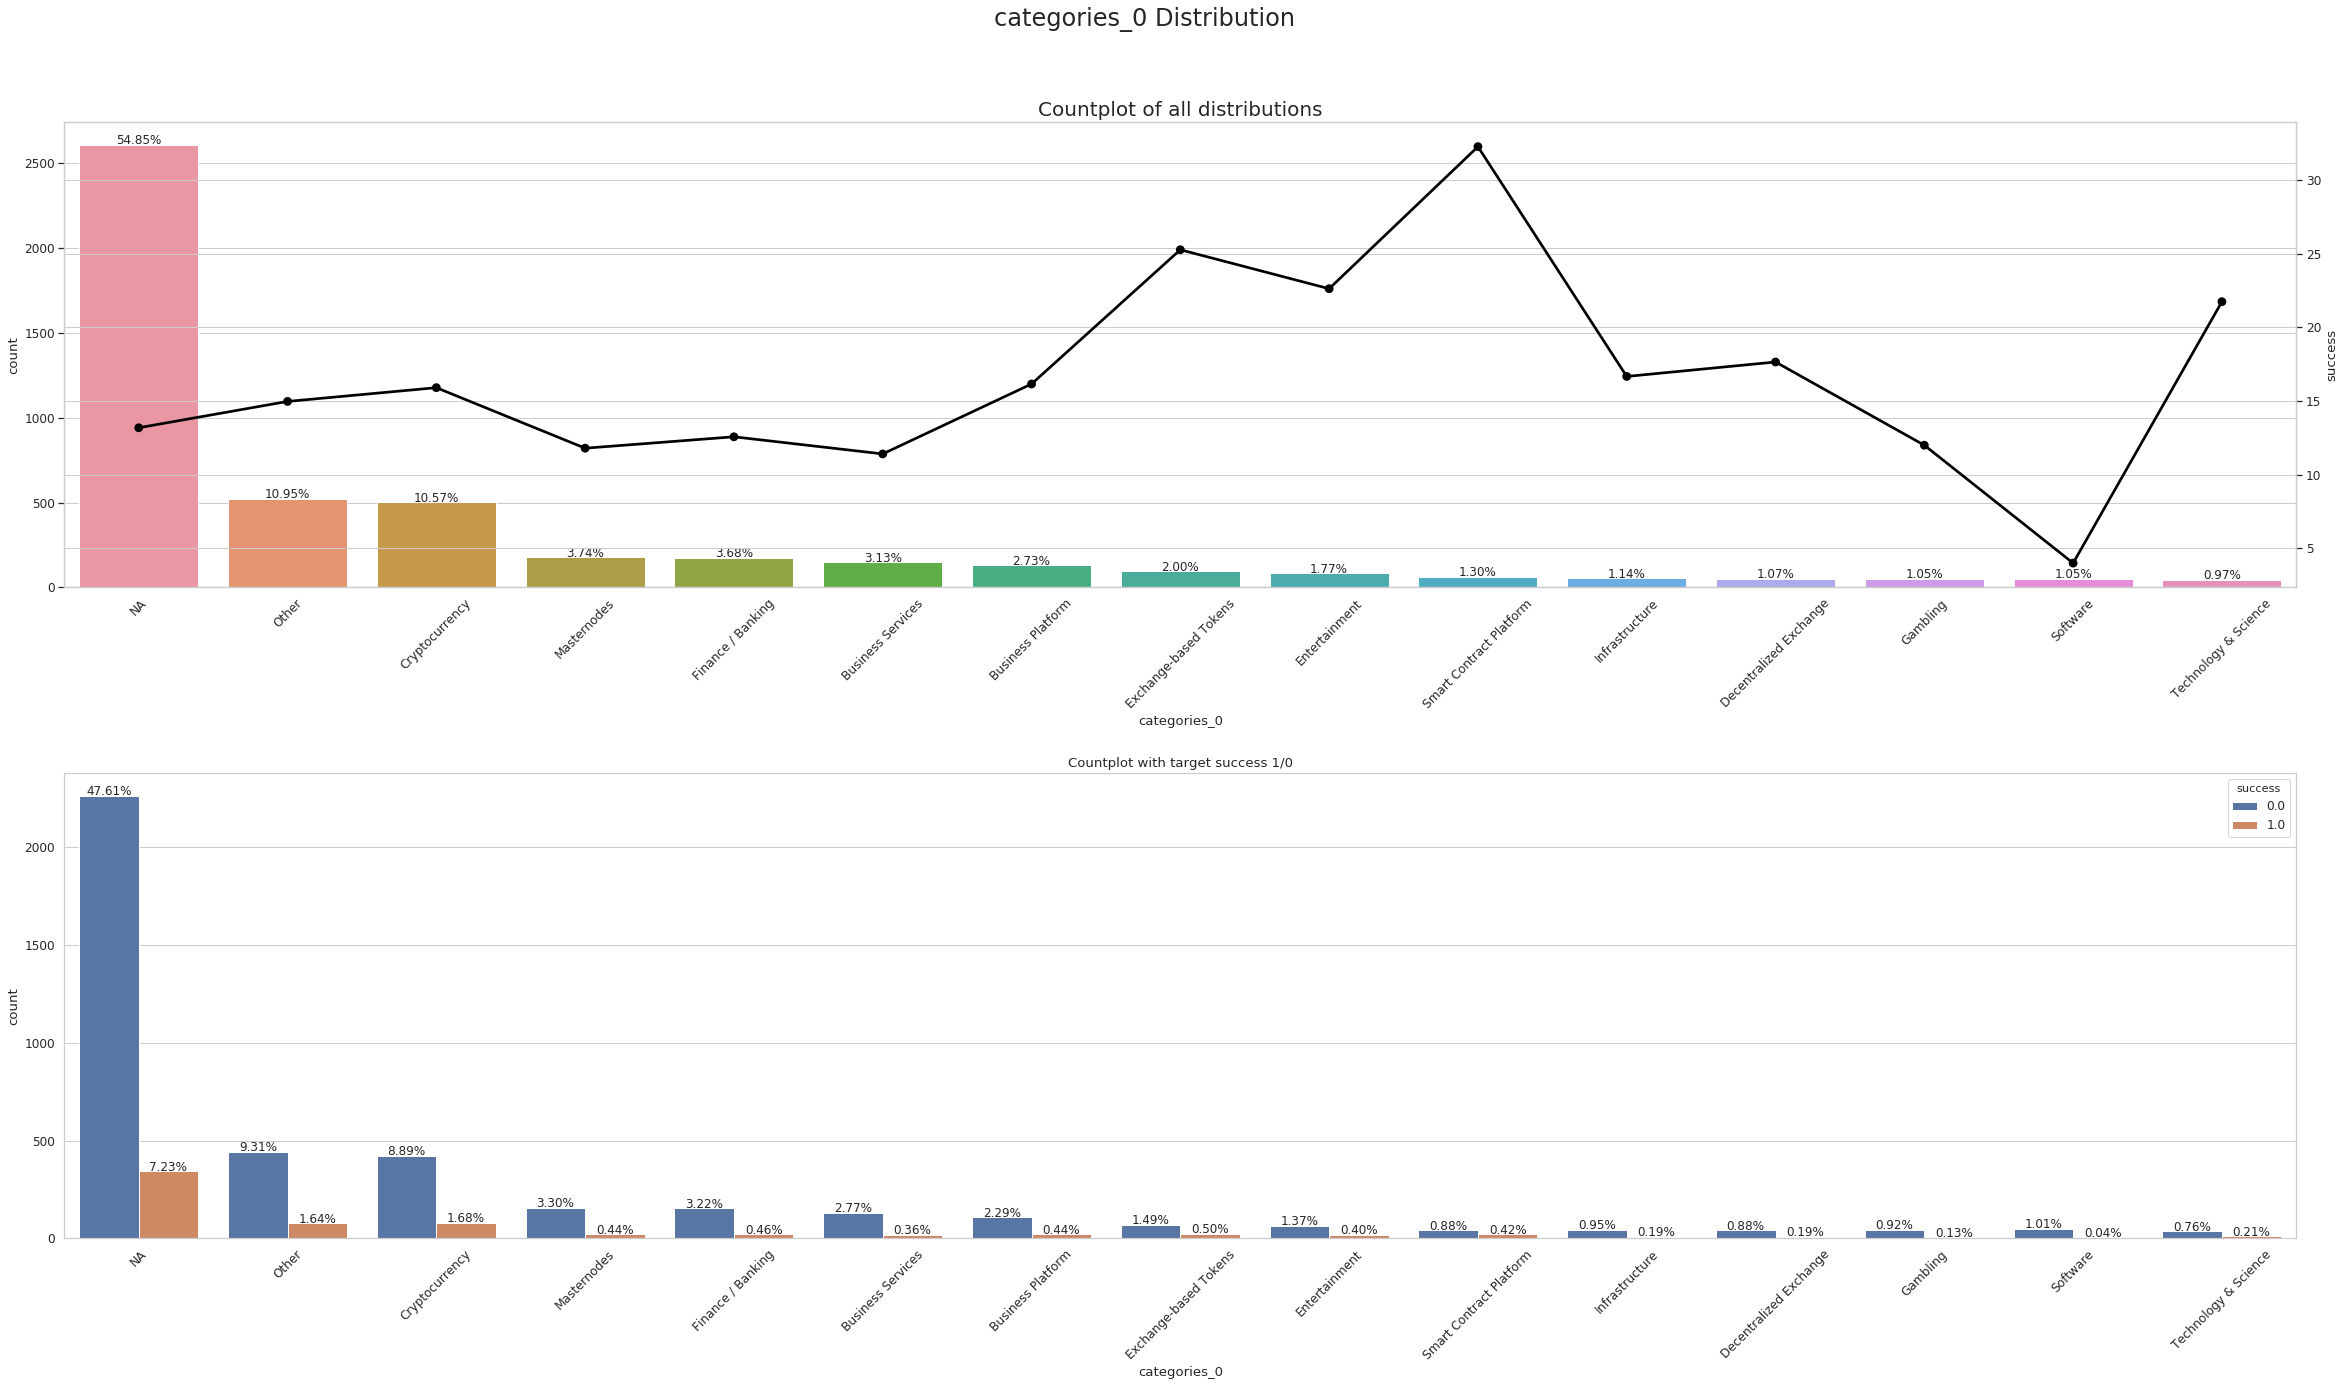

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


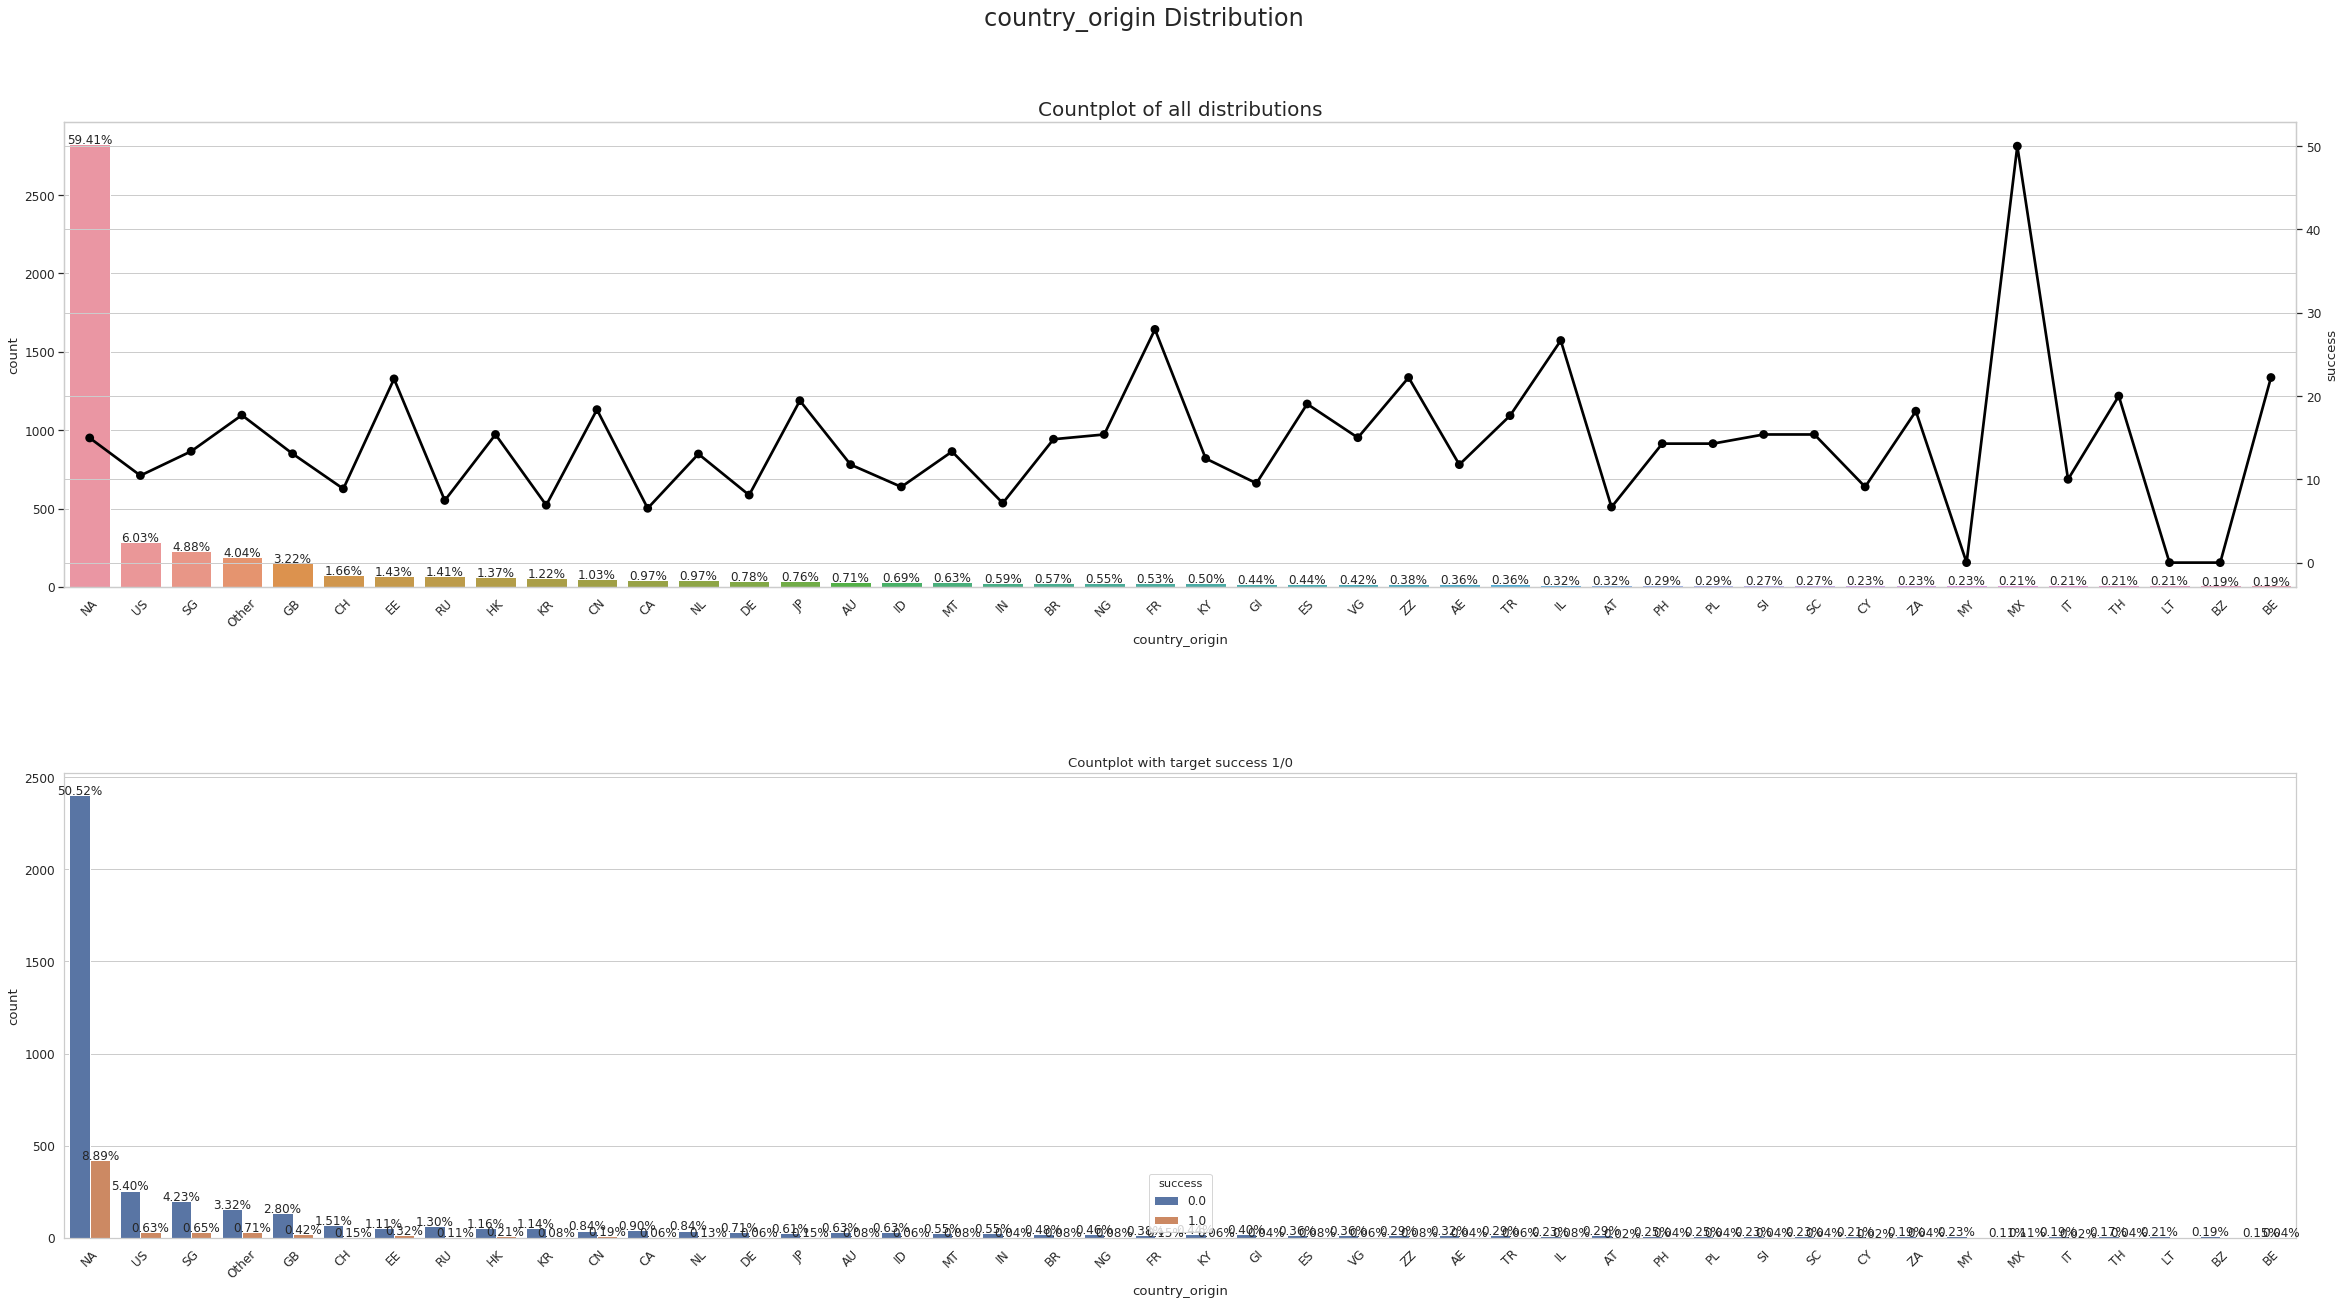

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


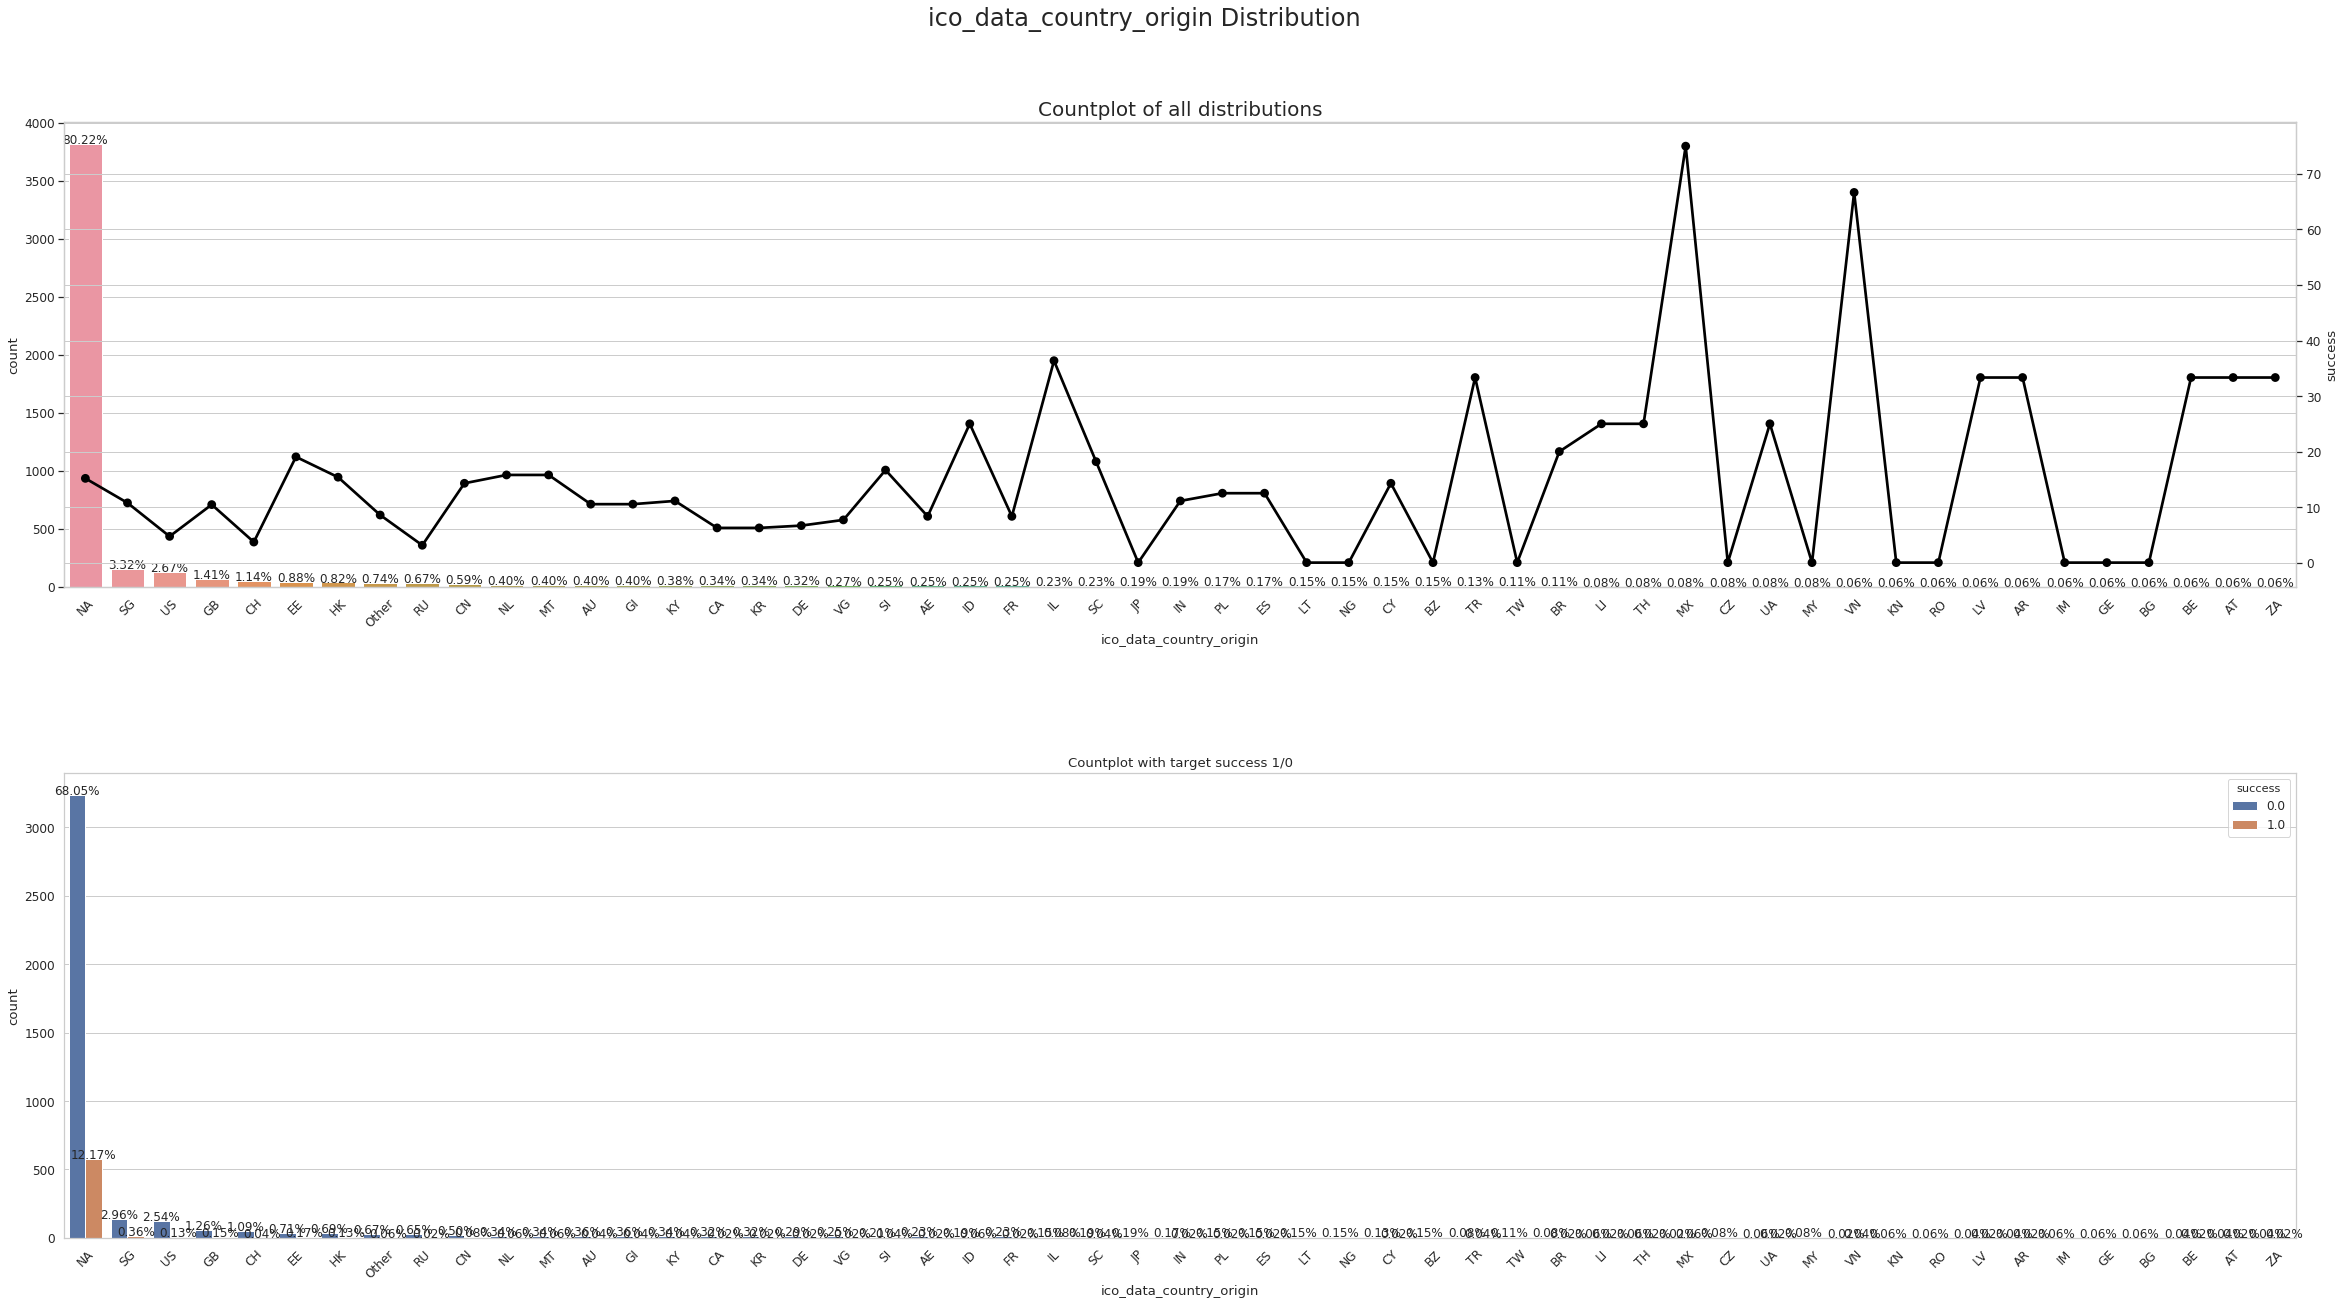

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

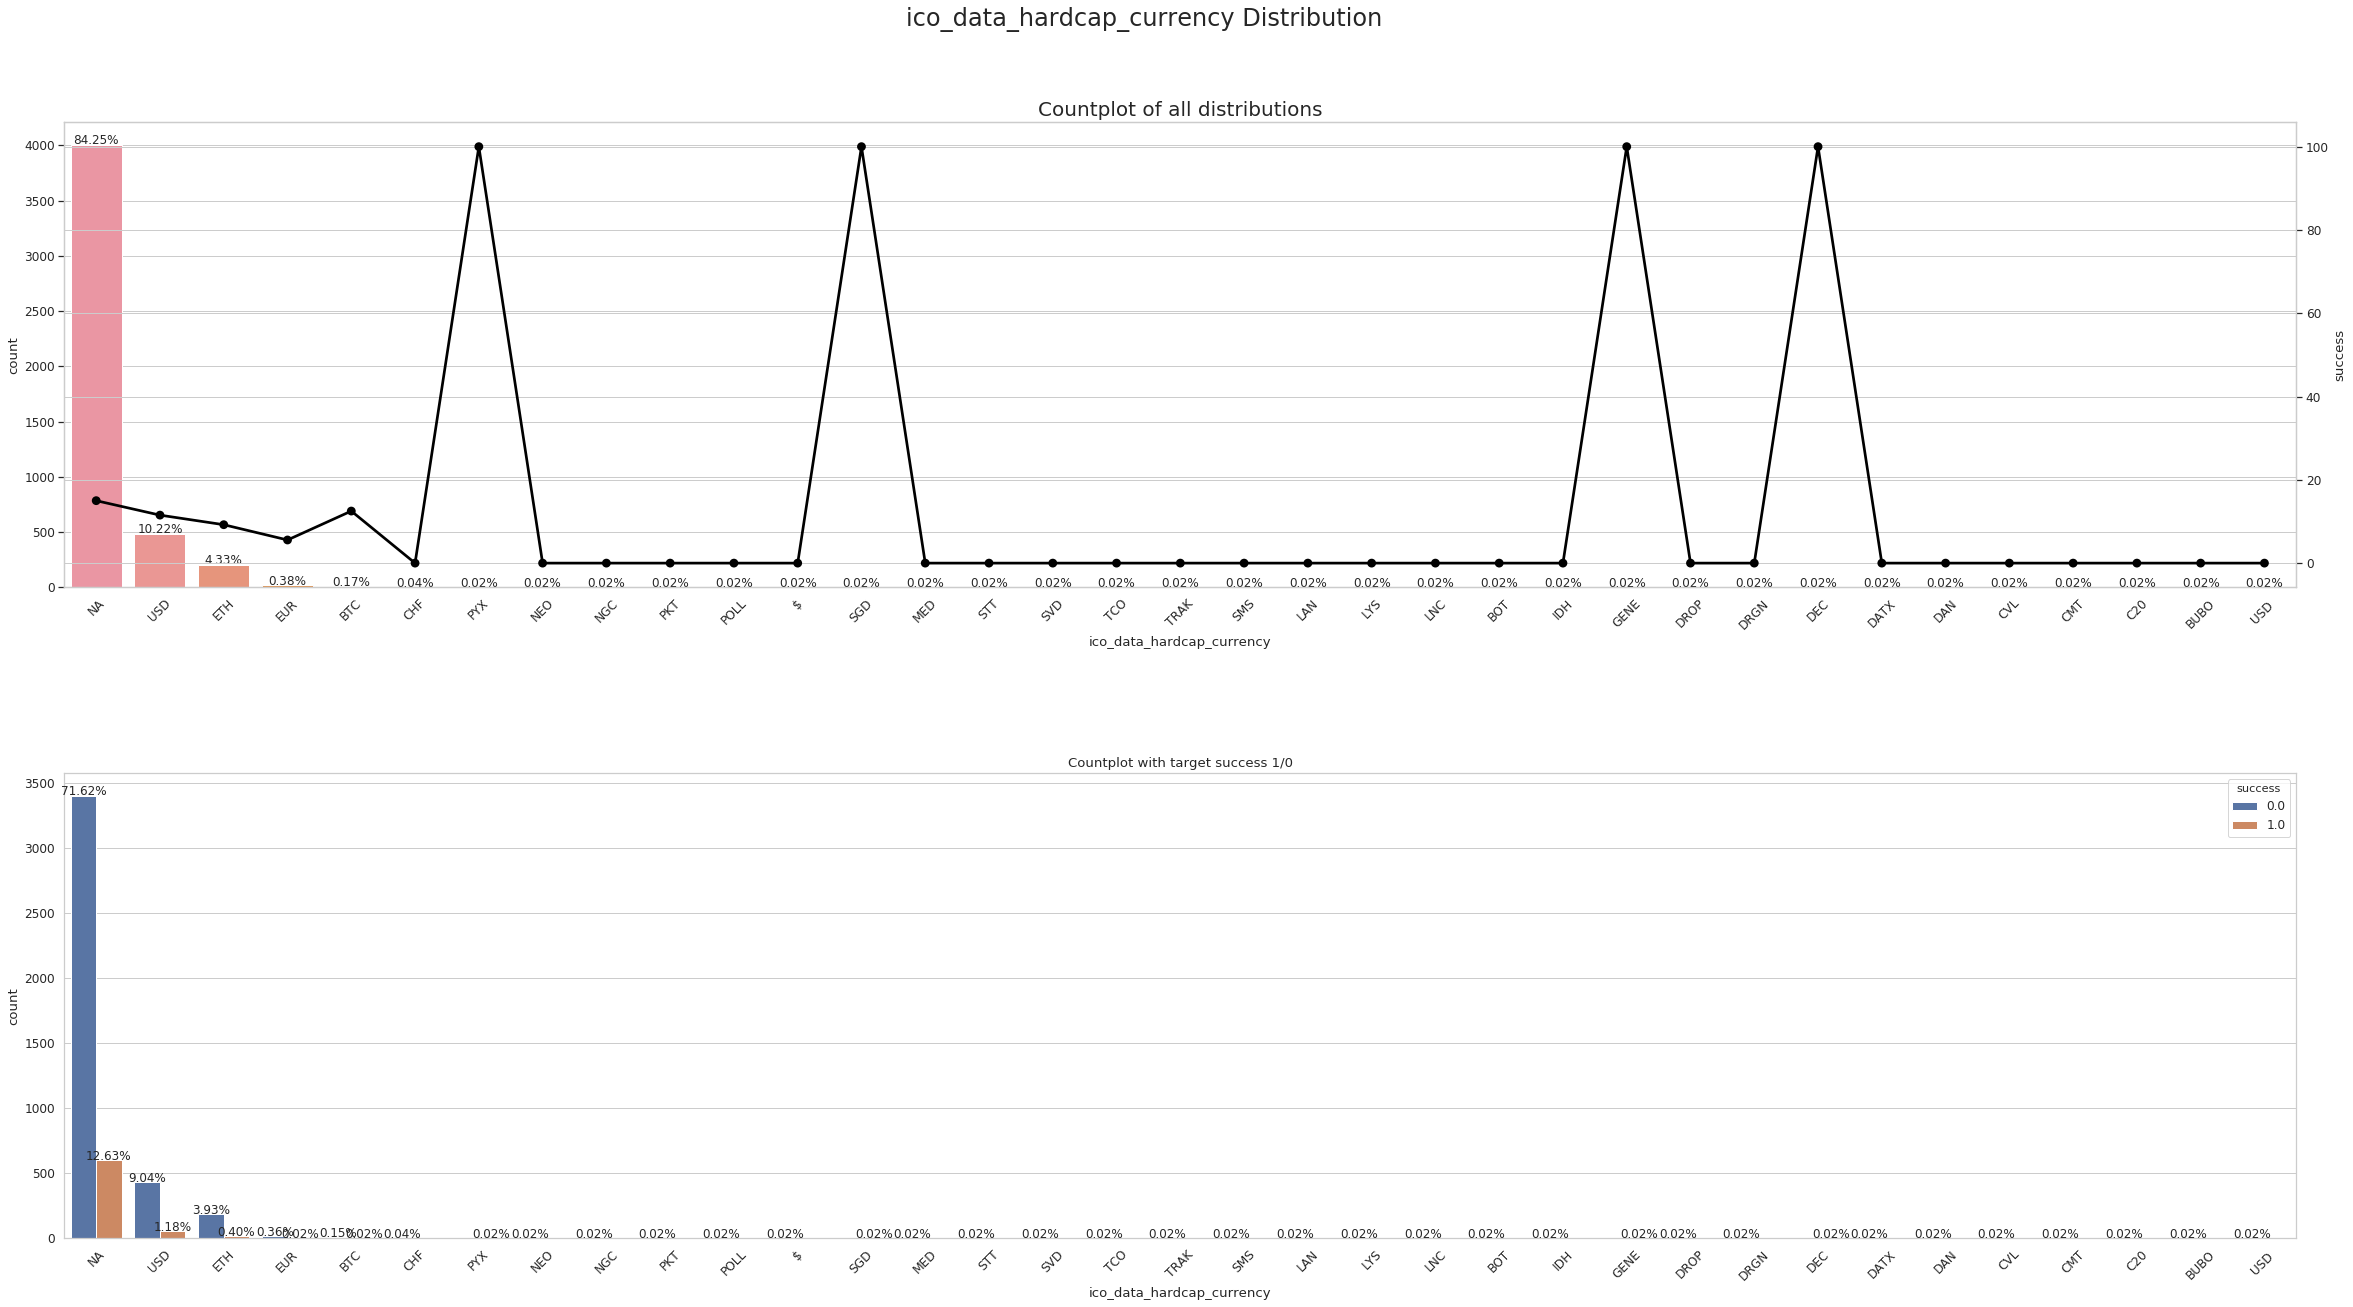

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

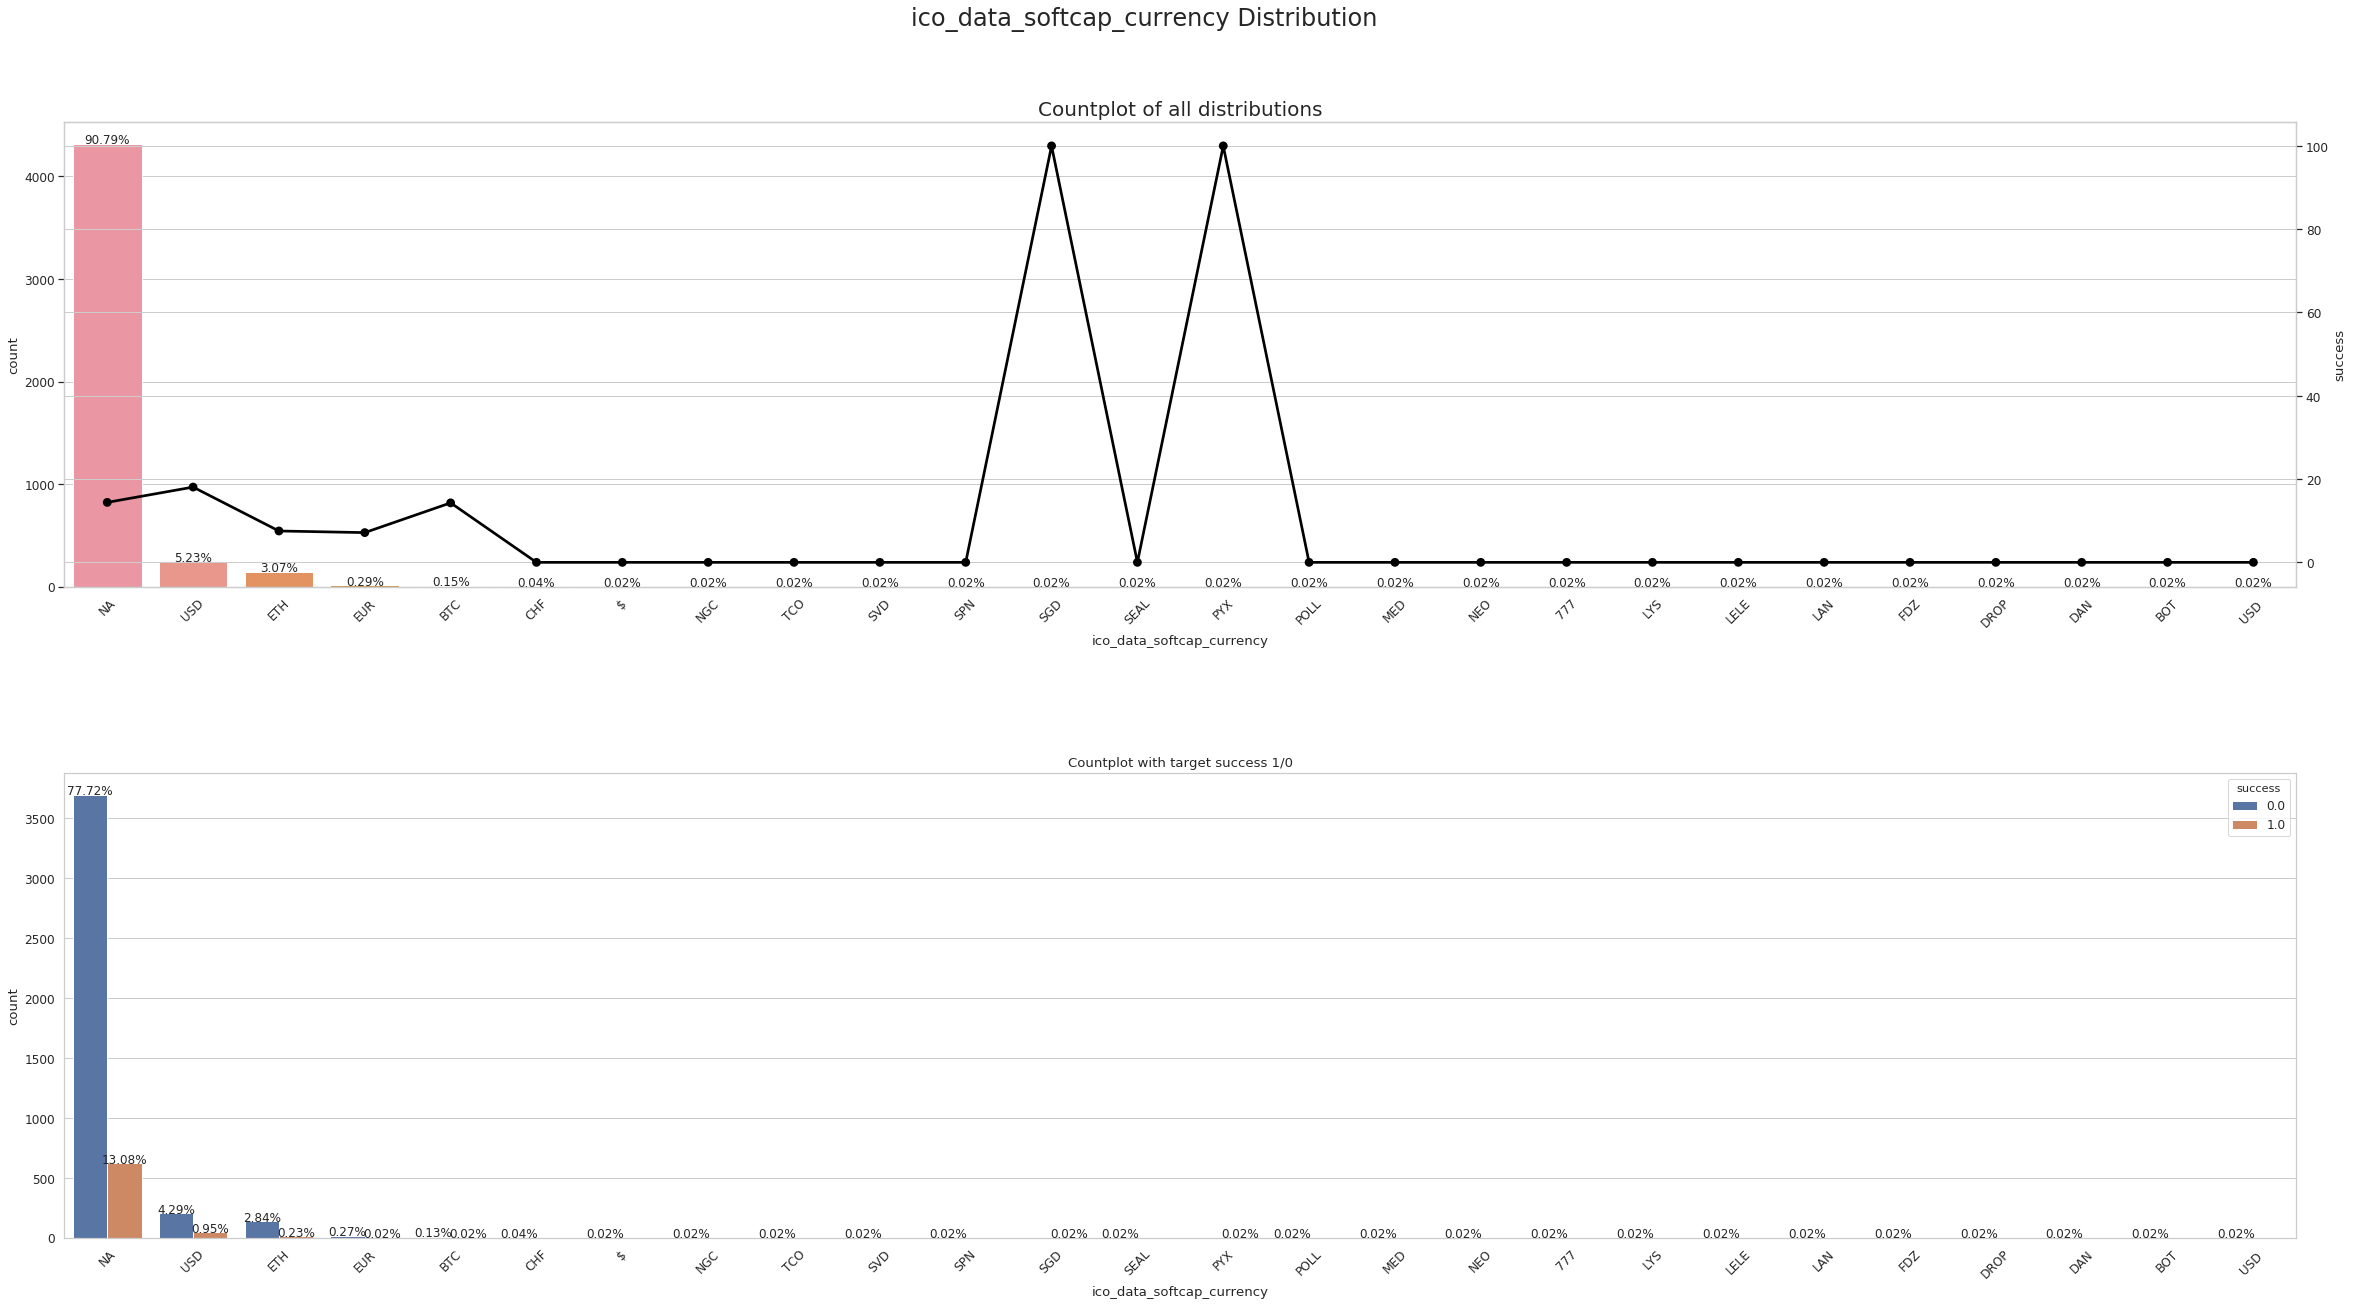

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


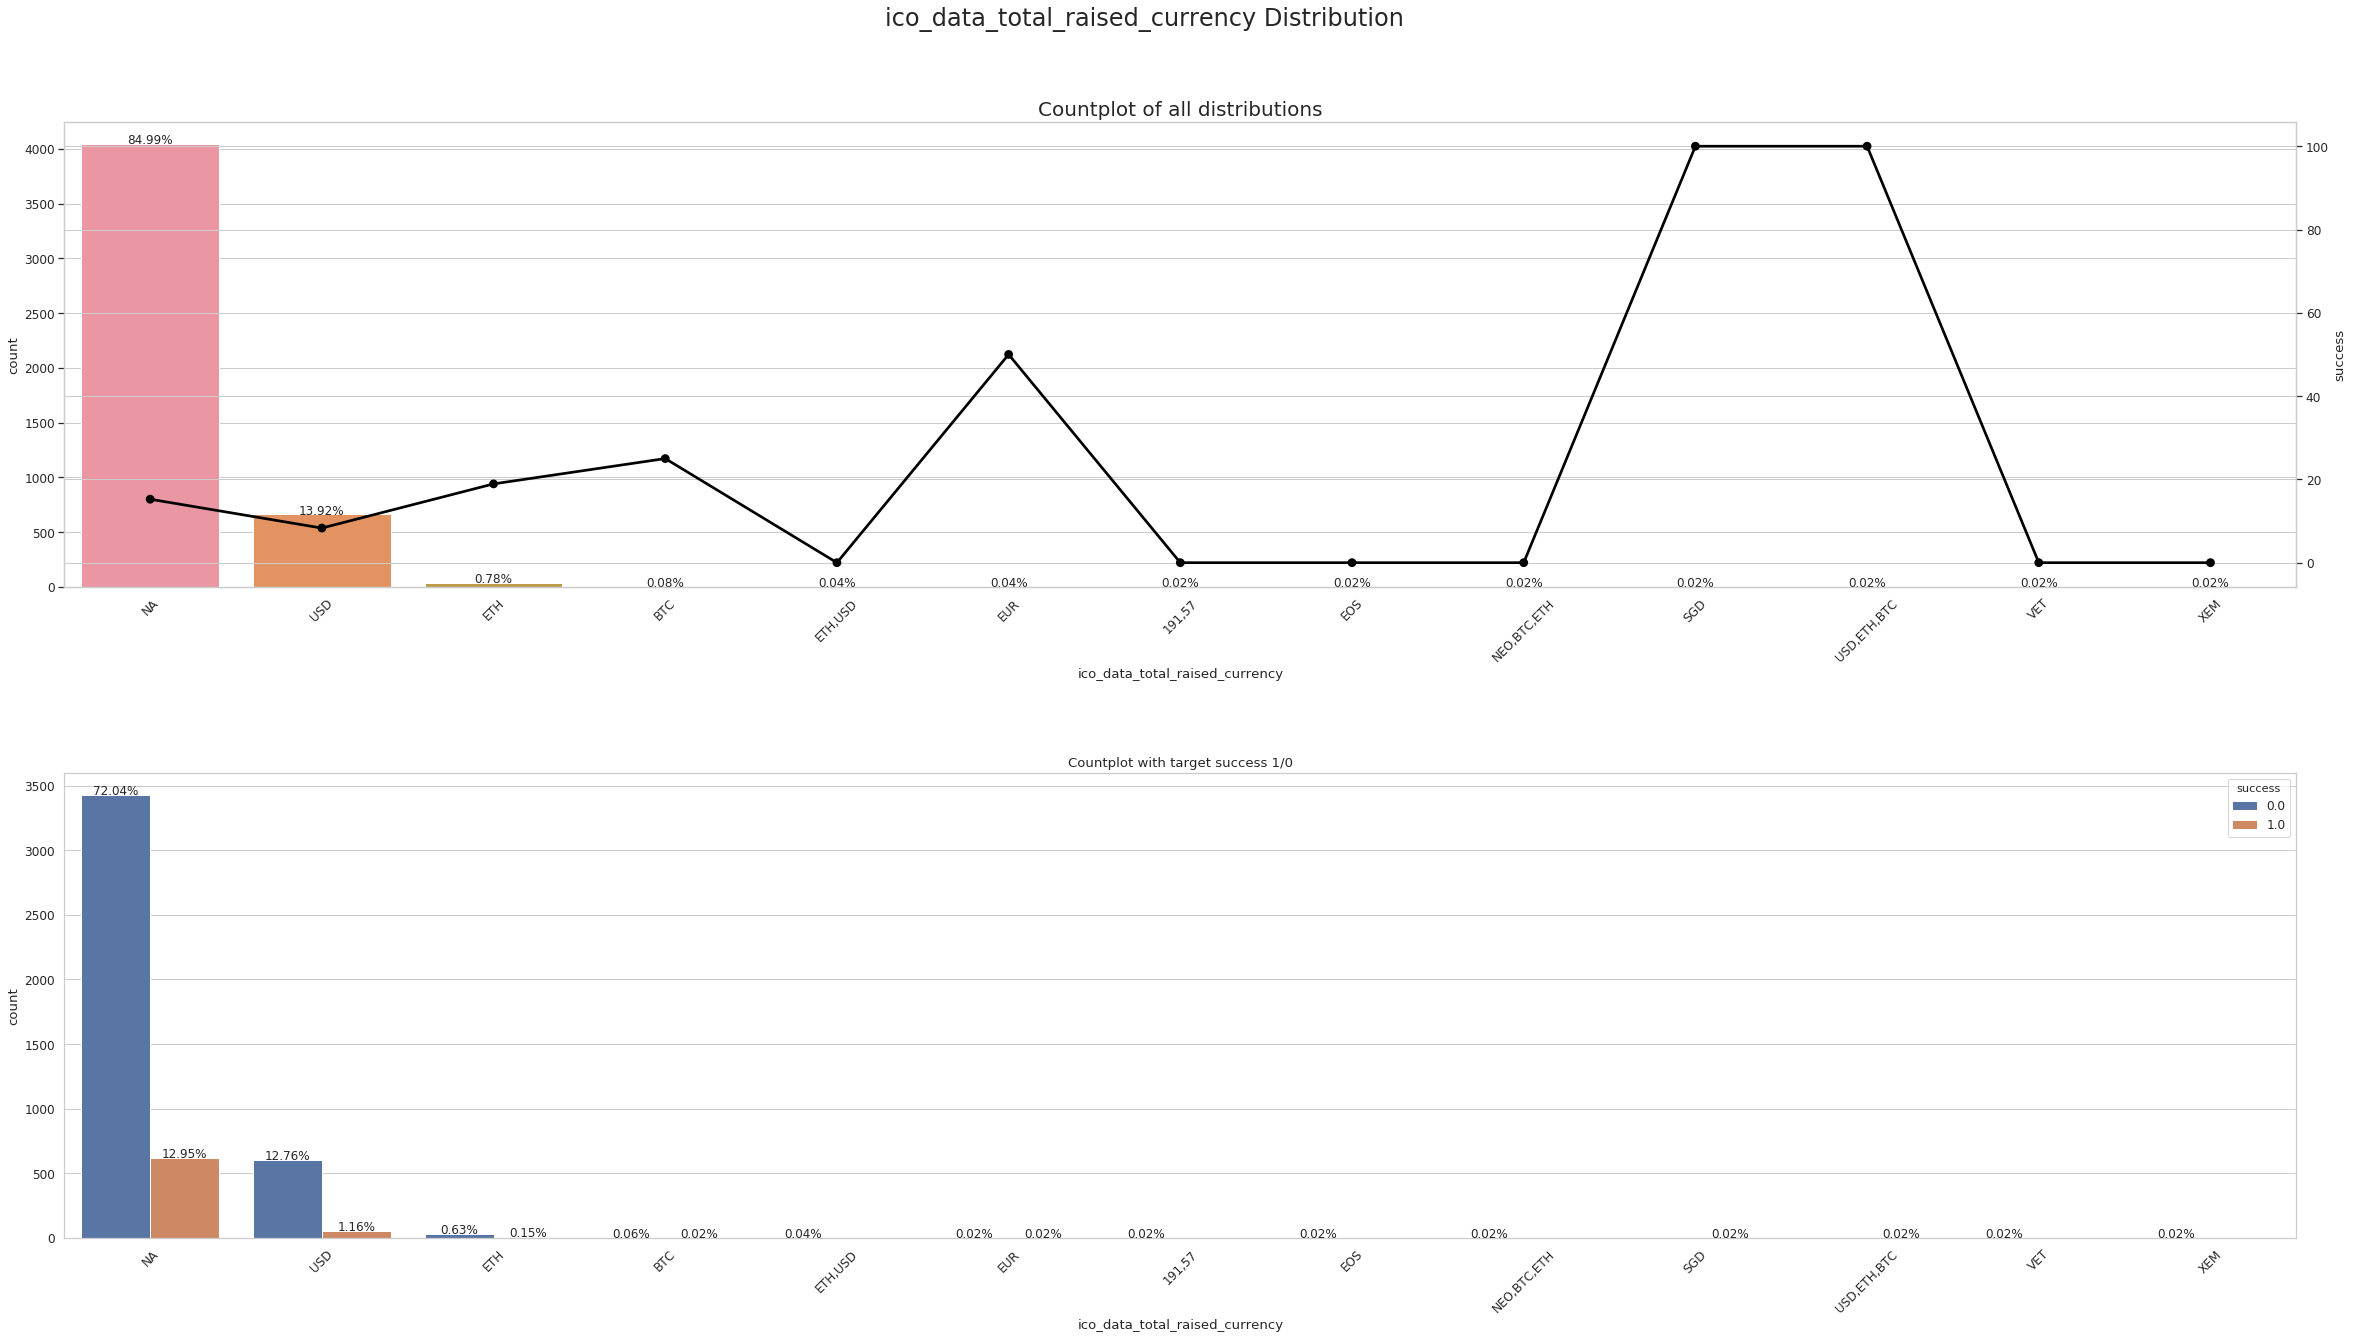

In [38]:
df = df_orig.copy()

for col in _categorical_featuers:
    df = set_quantile_to_value(df, col, 0.5);
    plot_cnt_distribution(df, col);

In [39]:
df.ico_data_total_raised_currency.value_counts()

NA             4043
USD             662
ETH              37
BTC               4
EUR               2
ETH,USD           2
191,57            1
XEM               1
NEO,BTC,ETH       1
USD,ETH,BTC       1
VET               1
SGD               1
EOS               1
Name: ico_data_total_raised_currency, dtype: int64